<a href="https://colab.research.google.com/github/grojasc/MIA/blob/main/Roa_Rm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Aprendizaje supervisado y No supervisado 💸
# Grupo 3 ▶ 
          - Nestor Borre
          - Pablo Castillo
          - Herman Granzow
          - Gonzalo Rojas

## Instalar Librerías

In [21]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
install.packages("class")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’




In [3]:
install.packages("caret")
install.packages("splitTools")
install.packages("DAAG")
install.packages("stats")
install.packages("readr")
install.packages("pROC")
install.packages("mlbench")
install.packages("MASS")
install.packages("lme4")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘png’, ‘jpeg’, ‘interp’, ‘rbibutils’, ‘latticeExtra’, ‘Rdpack’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/l

In [4]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importar Librerías

In [22]:
# importar librerías

library(stats)
library(caret) # validación cruzada
library(splitTools) # separación de datos
library(DAAG)
library(pROC)
library(mlbench)
library(MASS)
library(lme4)
library(readr)
library(dplyr)
library(car)
library(class)

library("corrplot")


corrplot 0.92 loaded



## Cargar Dataset 📓

In [6]:
rdf <- read.csv("/content/df_stack.csv", encoding = 'latin1')

# Análsis exploratorio 🔭 y pre-procesamiento

In [7]:
head(rdf)

Fecha      País CobIn      EPS       Estab    Pe        Peg      Psa     
1 01-06-2022 Al    30.409946  50.72388 3.603560  9.630703 2.111726 0.721575
2 01-06-2022 Au    26.263432 136.53716 2.993252 15.052067 4.420376 1.617911
3 01-06-2022 Br     7.073927  54.30619 2.482950  6.258359 1.162602 0.941023
4 01-06-2022 Ca    72.203879 102.30233 5.244425  8.604600 1.626919 1.697559
5 01-06-2022 Cl    12.088512  38.93045 2.414352  5.426070 1.568771 0.689270
6 01-06-2022 Cn   178.611472  40.03423 2.901341 21.387844 1.623700 2.139188
  Pt        RevEar     Rm         Roa      Roic      T10     Vol     
1 -21.41419  -4.426645 -1.7769655 4.555982  8.324617  1.4400 2.084092
2 -31.03983  -7.515292  0.3792009 8.133350 12.197991  3.6600 1.938329
3 -13.35005   1.108276 -3.4963217 9.584759 16.033178 13.1058 2.022834
4 -24.57883 -27.046469 -1.5816756 1.520313  9.879633  3.2100 1.308801
5  14.64756  41.490459 -2.3036254 7.519950 11.279389  6.4200 2.072950
6 -19.95050  -7.937370 -0.5227936 9.713874 15.219049  2.8205 2.787154

In [8]:
rdf$Fecha<- as.POSIXct( rdf$Fecha, format="%d-%m-%Y" )

In [9]:
head(rdf)

Fecha      País CobIn      EPS       Estab    Pe        Peg      Psa     
1 2022-06-01 Al    30.409946  50.72388 3.603560  9.630703 2.111726 0.721575
2 2022-06-01 Au    26.263432 136.53716 2.993252 15.052067 4.420376 1.617911
3 2022-06-01 Br     7.073927  54.30619 2.482950  6.258359 1.162602 0.941023
4 2022-06-01 Ca    72.203879 102.30233 5.244425  8.604600 1.626919 1.697559
5 2022-06-01 Cl    12.088512  38.93045 2.414352  5.426070 1.568771 0.689270
6 2022-06-01 Cn   178.611472  40.03423 2.901341 21.387844 1.623700 2.139188
  Pt        RevEar     Rm         Roa      Roic      T10     Vol     
1 -21.41419  -4.426645 -1.7769655 4.555982  8.324617  1.4400 2.084092
2 -31.03983  -7.515292  0.3792009 8.133350 12.197991  3.6600 1.938329
3 -13.35005   1.108276 -3.4963217 9.584759 16.033178 13.1058 2.022834
4 -24.57883 -27.046469 -1.5816756 1.520313  9.879633  3.2100 1.308801
5  14.64756  41.490459 -2.3036254 7.519950 11.279389  6.4200 2.072950
6 -19.95050  -7.937370 -0.5227936 9.713874 15.219049  2.8205 2.787154

In [10]:
rdf2 <- subset(rdf, Fecha > '2010-01-01')

In [11]:
head(rdf2)

Fecha      País CobIn      EPS       Estab    Pe        Peg      Psa     
1 2022-06-01 Al    30.409946  50.72388 3.603560  9.630703 2.111726 0.721575
2 2022-06-01 Au    26.263432 136.53716 2.993252 15.052067 4.420376 1.617911
3 2022-06-01 Br     7.073927  54.30619 2.482950  6.258359 1.162602 0.941023
4 2022-06-01 Ca    72.203879 102.30233 5.244425  8.604600 1.626919 1.697559
5 2022-06-01 Cl    12.088512  38.93045 2.414352  5.426070 1.568771 0.689270
6 2022-06-01 Cn   178.611472  40.03423 2.901341 21.387844 1.623700 2.139188
  Pt        RevEar     Rm         Roa      Roic      T10     Vol     
1 -21.41419  -4.426645 -1.7769655 4.555982  8.324617  1.4400 2.084092
2 -31.03983  -7.515292  0.3792009 8.133350 12.197991  3.6600 1.938329
3 -13.35005   1.108276 -3.4963217 9.584759 16.033178 13.1058 2.022834
4 -24.57883 -27.046469 -1.5816756 1.520313  9.879633  3.2100 1.308801
5  14.64756  41.490459 -2.3036254 7.519950 11.279389  6.4200 2.072950
6 -19.95050  -7.937370 -0.5227936 9.713874 15.219049  2.8205 2.787154

In [12]:
dim(rdf)
dim(rdf2)

[1] 7701   15

[1] 2980   15

In [13]:
rdf2$Fecha <- format(rdf2$Fecha,format = "%Y")

In [14]:
#plyr::mapvalues(rdf2$País, from = c("Al", "Au", "Br"), to = c(1,2,3))
rdf2$País <-dplyr::recode(rdf2$País, Al = 1, Au = 2, Br = 3,Ca=4, Cl=5,Cn=6,Co=7,Fr=7, Hg=8, Hk=9, In=10, It=11, Jp= 12, Ko=12,Mx=13,Rc=14,Sa=15, Ta=16,Uk=17, Us=18)
## [1] "apple"  "banana" "carrot" "banana" "apple" 

#pais_map = {'Al':1,'Au':2,'Br':3,'Ca':4, 'Cl':5,'Cn':6,'Co':6,'Fr':7, 'Hg':8, 'Hk':9, 'In':10, 'It':11, 'Jp': 12, 'Ko':12,'Mx':13,'Rc':14,'Sa':15, 'Ta':16, 'Uk':17, 'Us':18}

In [15]:
rdf2$País

[1]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4
  [25]  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7
  [49]  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11
  [73] 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14
  [97] 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18
 [121]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4
 [145]  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7
 [169]  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11
 [193] 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14
 [217] 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18
 [241]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4
 [265]  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7
 [289]  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11
 [313] 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14
 [337] 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18
 [361]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4
 [385]  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7
 [409]  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11
 [433] 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14
 [457] 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18
 [481]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4
 [505]  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7
 [529]  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11
 [553] 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14
 [577] 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18
 [601]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4
 [625]  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7
 [649]  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11
 [673] 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14
 [697] 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18
 [721]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4
 [745]  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7
 [769]  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11
 [793] 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14
 [817] 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18
 [841]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4
 [865]  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7
 [889]  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11
 [913] 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14
 [937] 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18
 [961]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4
 [985]  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7
[1009]  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11
[1033] 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14
[1057] 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18
[1081]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4
[1105]  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7
[1129]  8  9 10 11 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11
[1153] 12 12 13 14 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14
[1177] 15 16 17 18  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 14 15 16 17 18
[1201]  1  2  3  4  5  6  7  7  8  9 10 11 12 12 13 1

In [16]:
rdf2$Fecha <- as.numeric(rdf2$Fecha)

In [17]:
summary(rdf2)

     Fecha           País           CobIn              EPS        
 Min.   :2010   Min.   : 1.00   Min.   :  3.722   Min.   :-10.10  
 1st Qu.:2013   1st Qu.: 5.75   1st Qu.: 12.451   1st Qu.: 21.51  
 Median :2016   Median : 9.50   Median : 21.695   Median : 37.51  
 Mean   :2016   Mean   : 9.50   Mean   : 48.842   Mean   : 44.00  
 3rd Qu.:2019   3rd Qu.:13.25   3rd Qu.: 53.148   3rd Qu.: 56.65  
 Max.   :2022   Max.   :18.00   Max.   :627.733   Max.   :234.93  
     Estab              Pe                 Peg                Psa        
 Min.   :0.6247   Min.   :-14184.40   Min.   : 0.07302   Min.   :0.3623  
 1st Qu.:2.9591   1st Qu.:    13.30   1st Qu.: 1.61253   1st Qu.:0.9153  
 Median :3.6058   Median :    16.32   Median : 2.15083   Median :1.2575  
 Mean   :3.7684   Mean   :    13.84   Mean   : 2.31726   Mean   :1.3434  
 3rd Qu.:4.3278   3rd Qu.:    20.57   3rd Qu.: 2.88773   3rd Qu.:1.6344  
 Max.   :9.2072   Max.   :  1315.91   Max.   :11.14063   Max.   :4.7656  
       Pt    

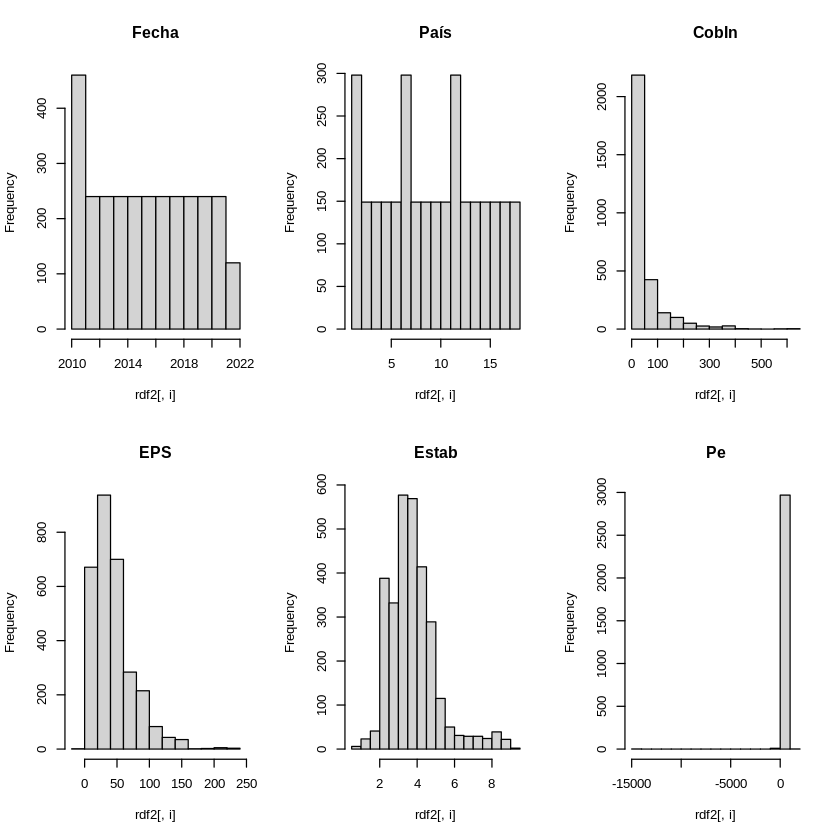

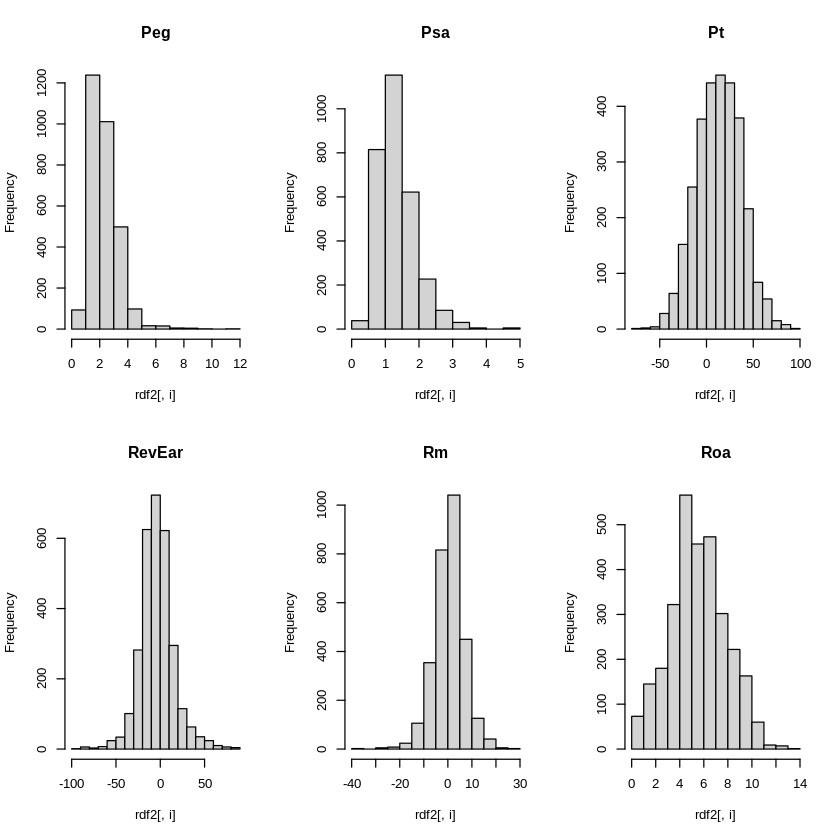

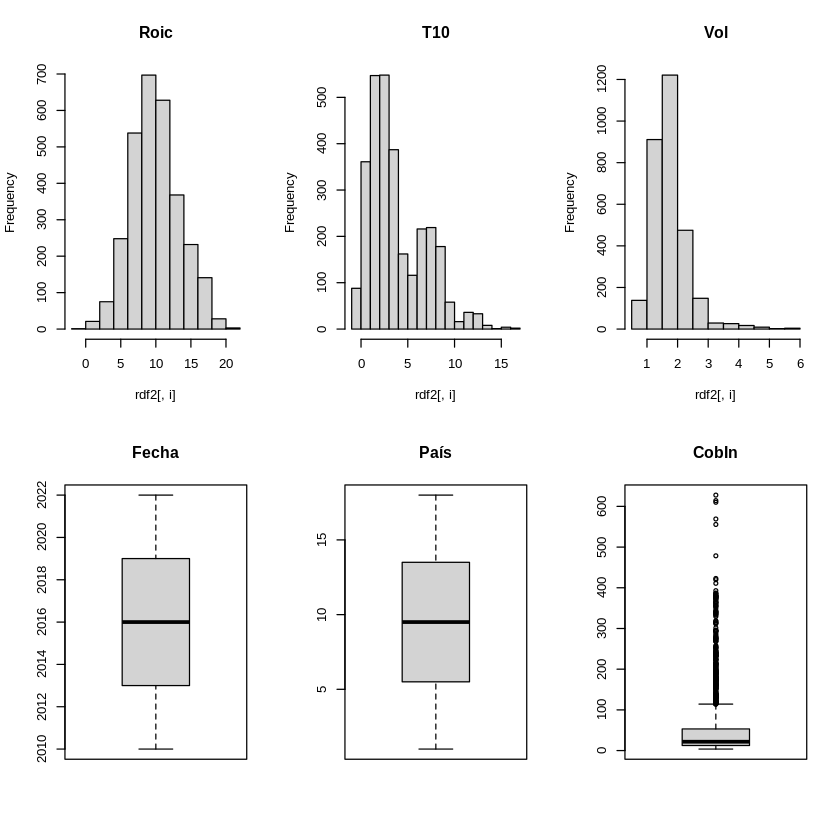

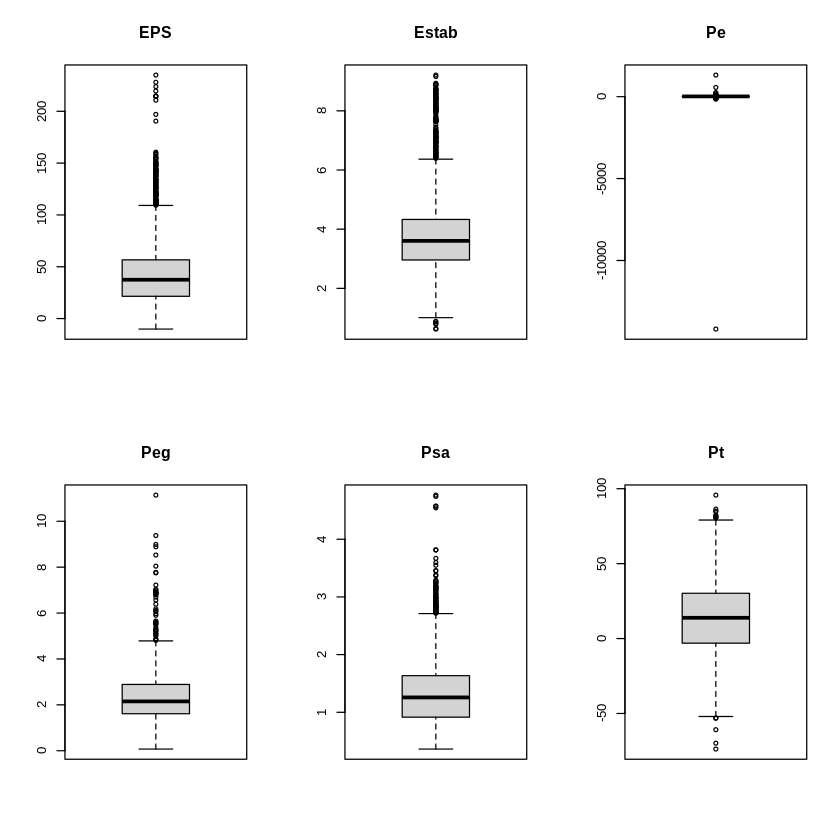

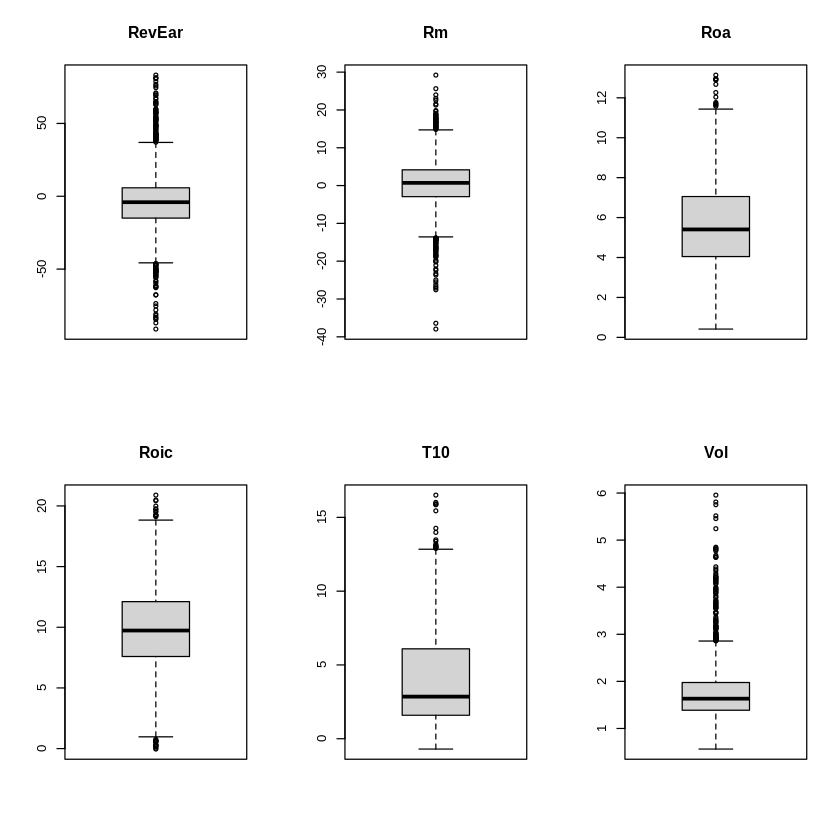

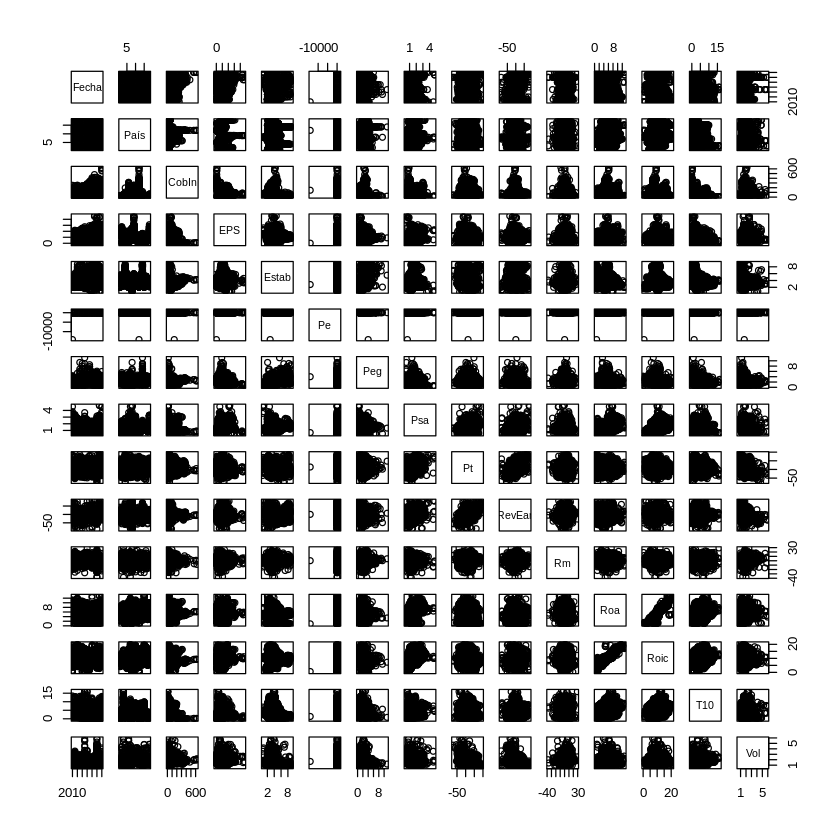

In [18]:
#histogramas y boxplots para todas las variables
par(mfrow=c(2,3))
for(i in 1:15)hist(rdf2[,i],main=names(rdf2)[i])
for(i in 1:15)boxplot(rdf2[,i],main=names(rdf2)[i])
pairs(rdf2)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



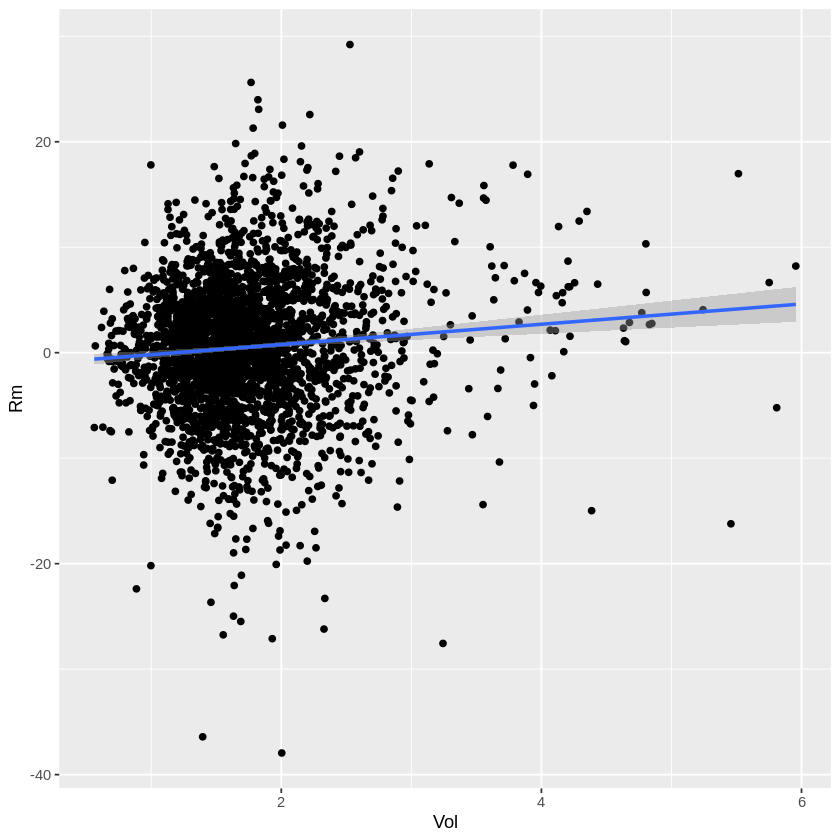

`geom_smooth()` using formula 'y ~ x'



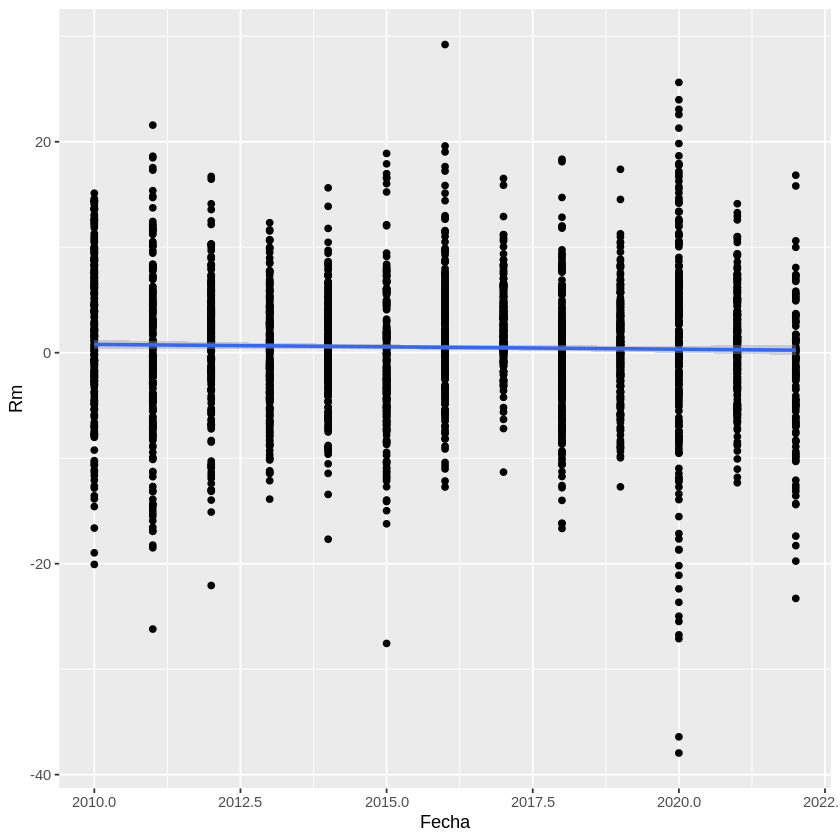

`geom_smooth()` using formula 'y ~ x'



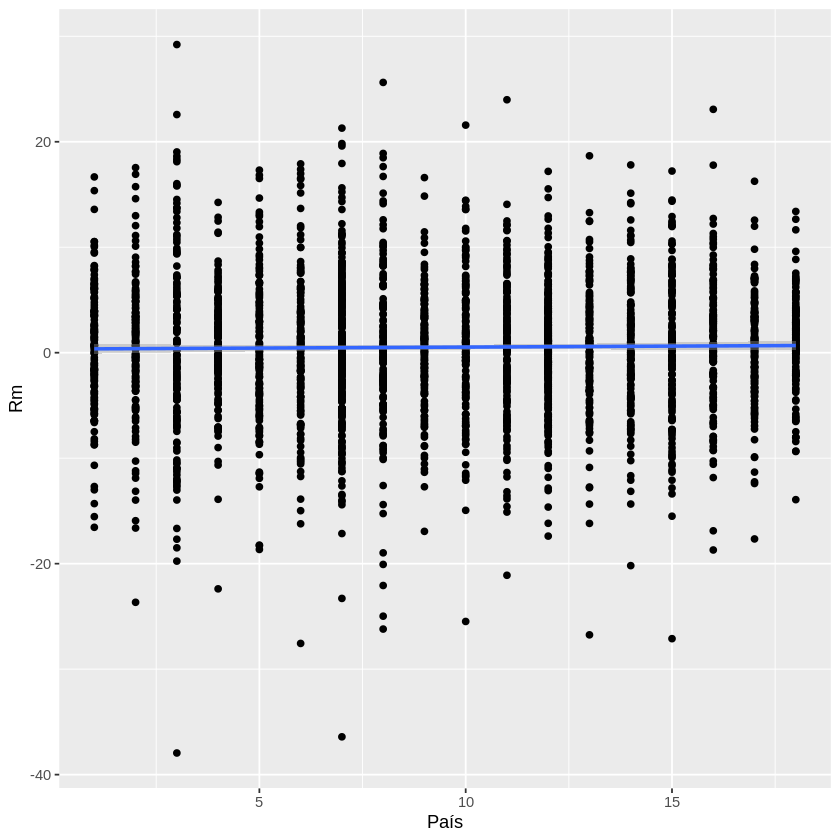

`geom_smooth()` using formula 'y ~ x'



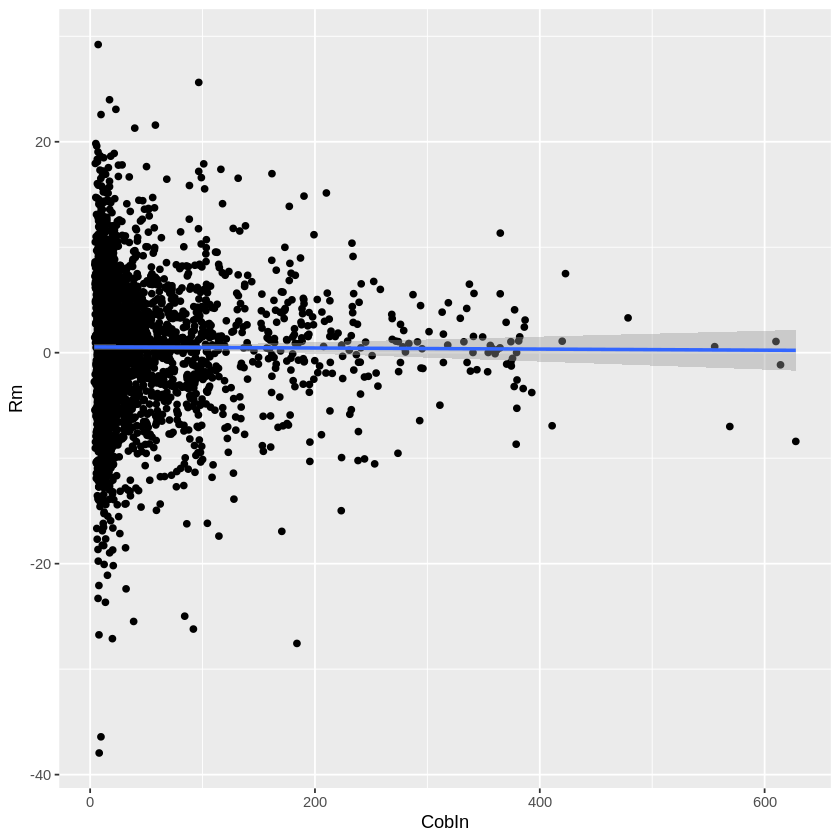

`geom_smooth()` using formula 'y ~ x'



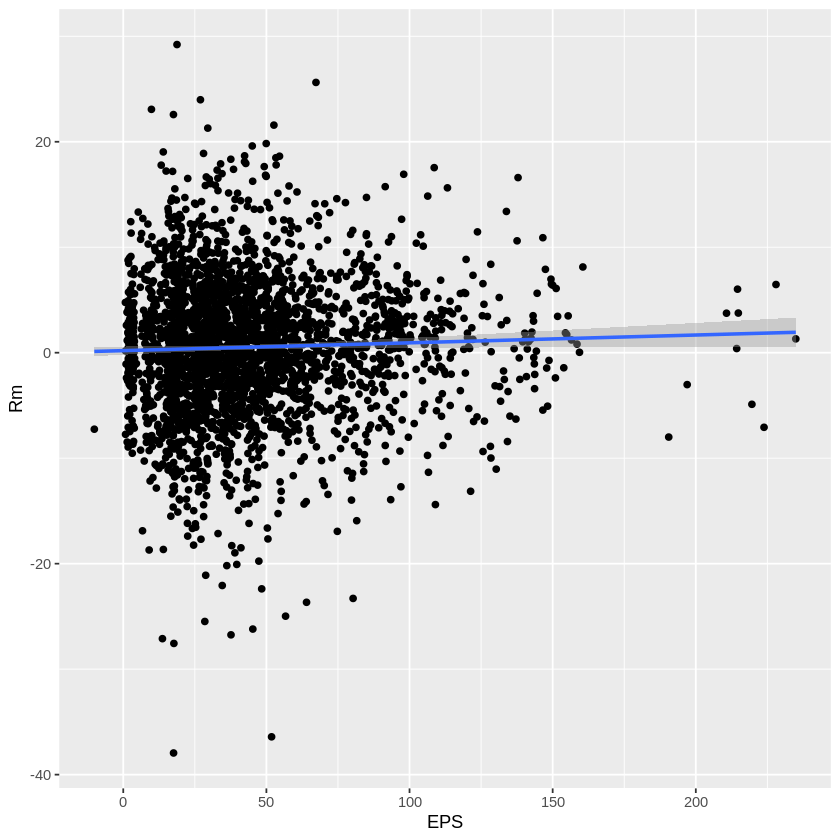

`geom_smooth()` using formula 'y ~ x'



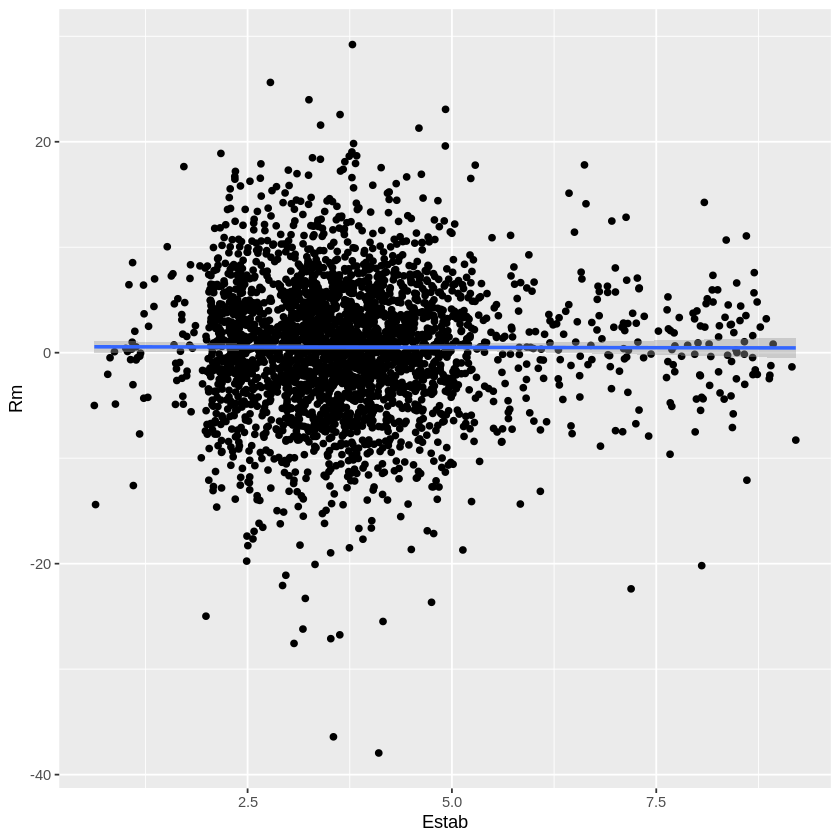

`geom_smooth()` using formula 'y ~ x'



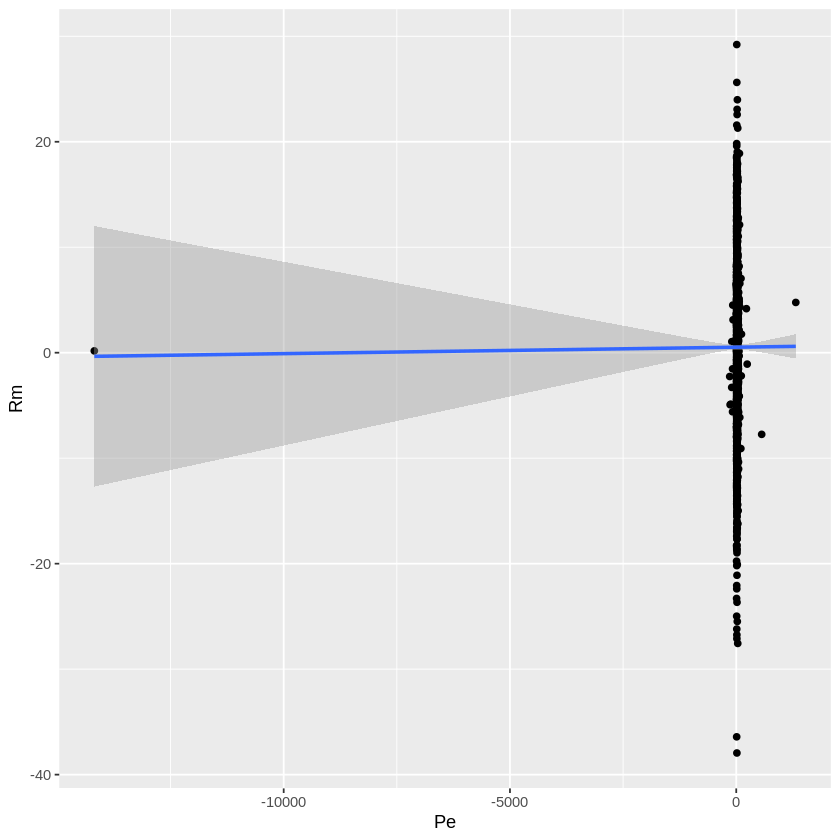

`geom_smooth()` using formula 'y ~ x'



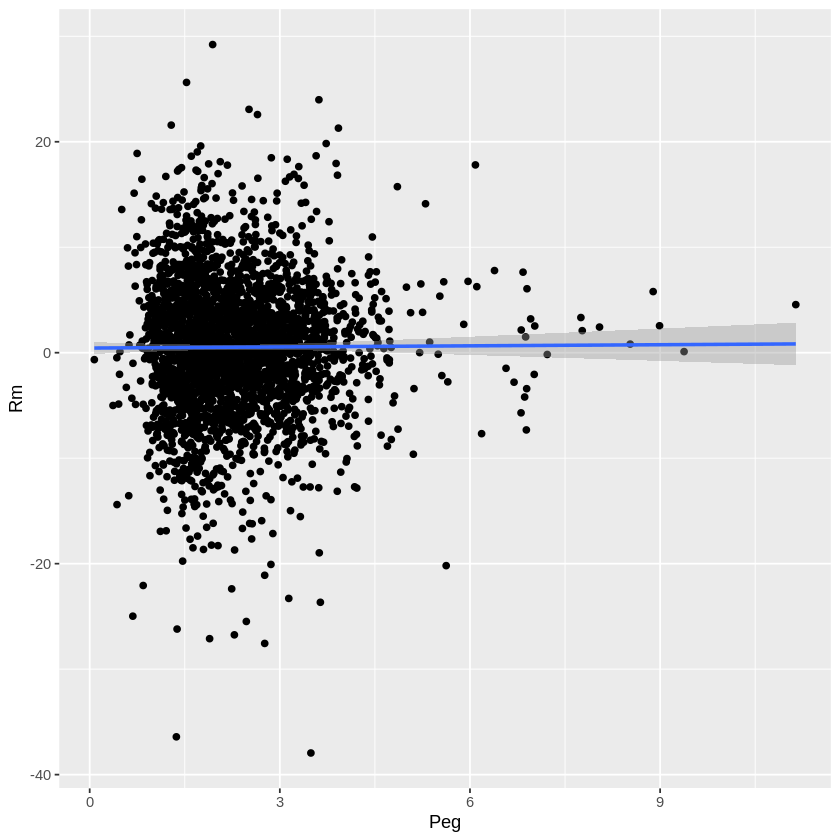

`geom_smooth()` using formula 'y ~ x'



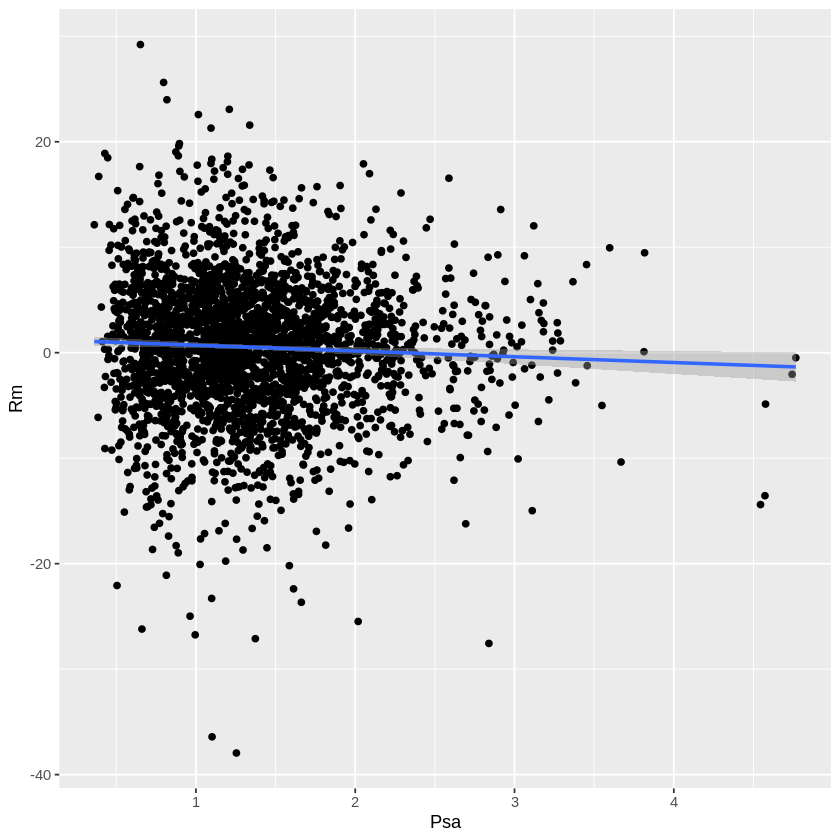

`geom_smooth()` using formula 'y ~ x'



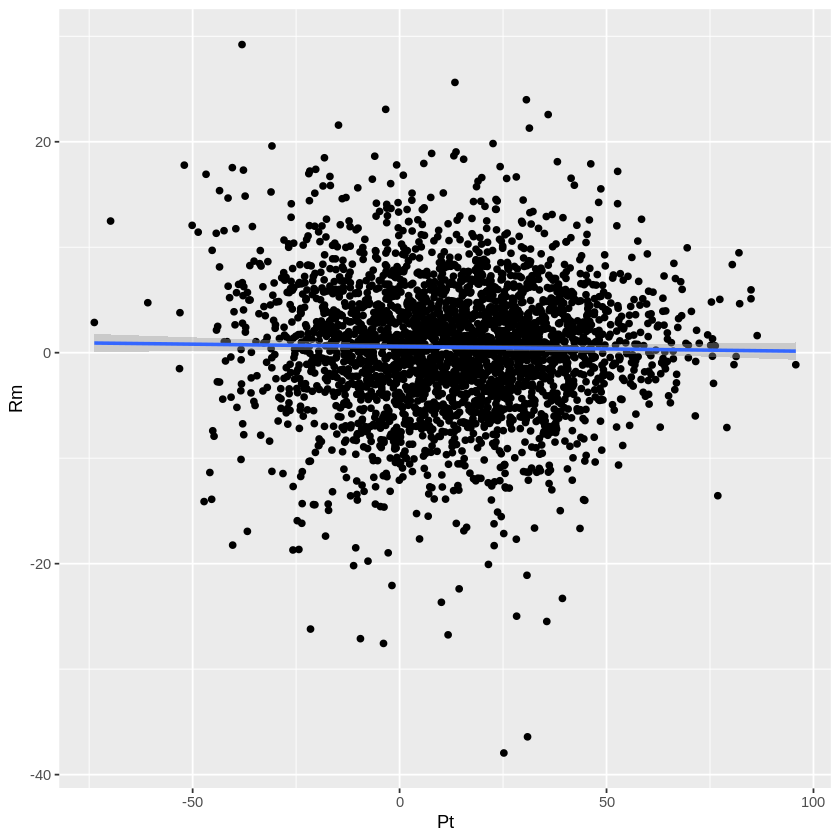

`geom_smooth()` using formula 'y ~ x'



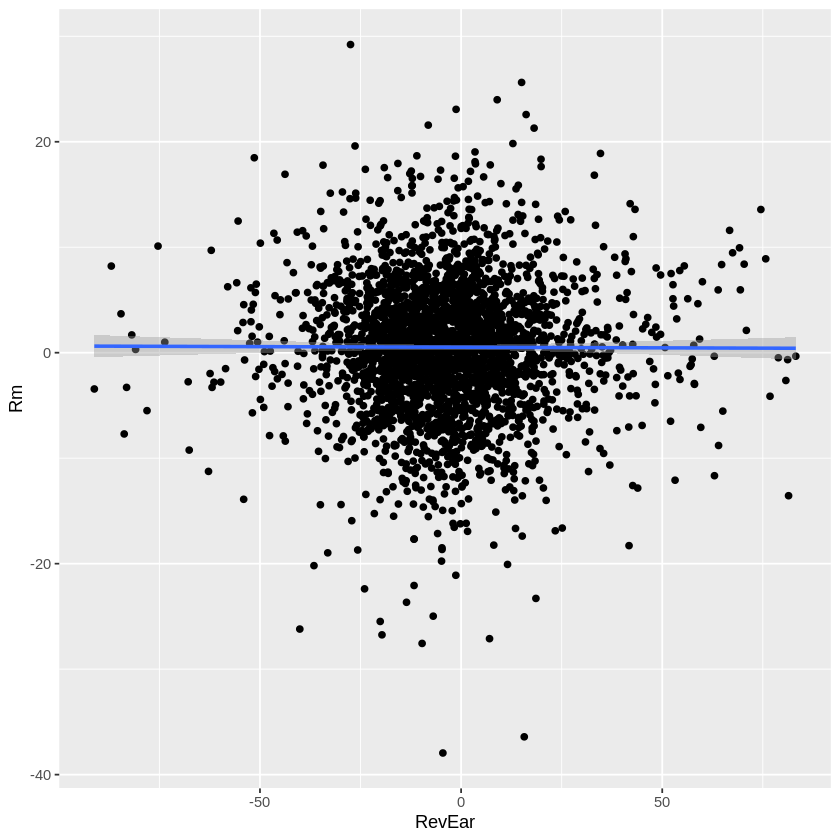

`geom_smooth()` using formula 'y ~ x'



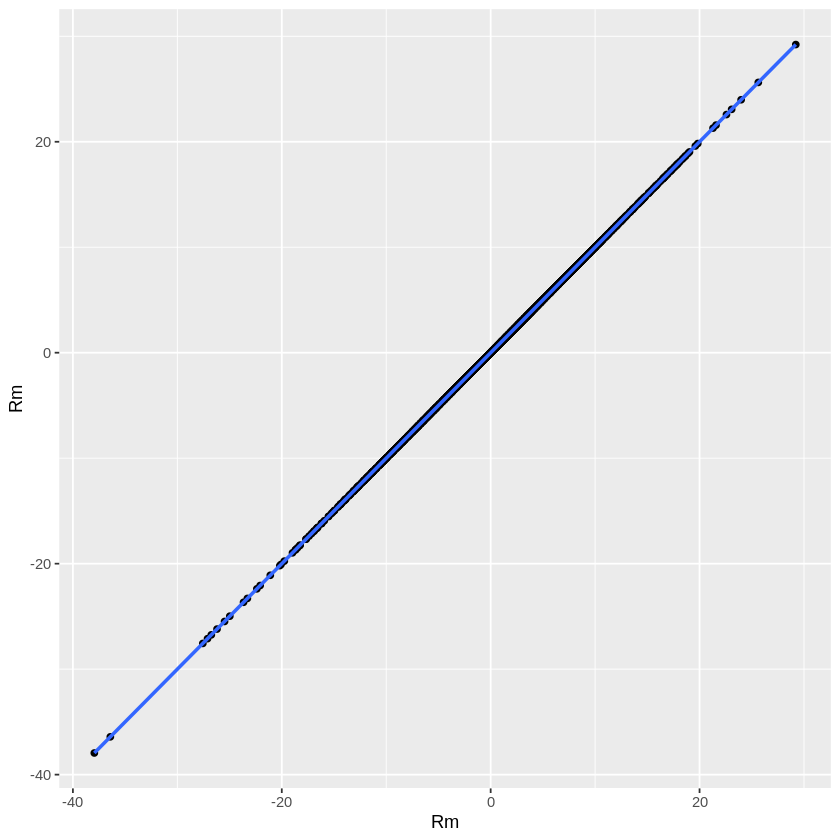

`geom_smooth()` using formula 'y ~ x'



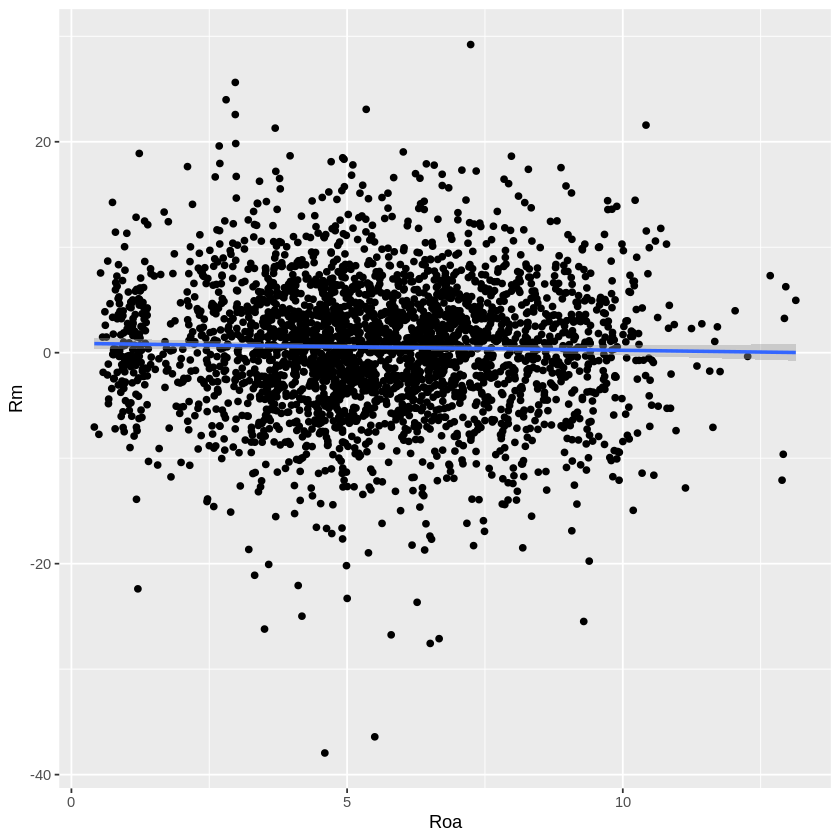

`geom_smooth()` using formula 'y ~ x'



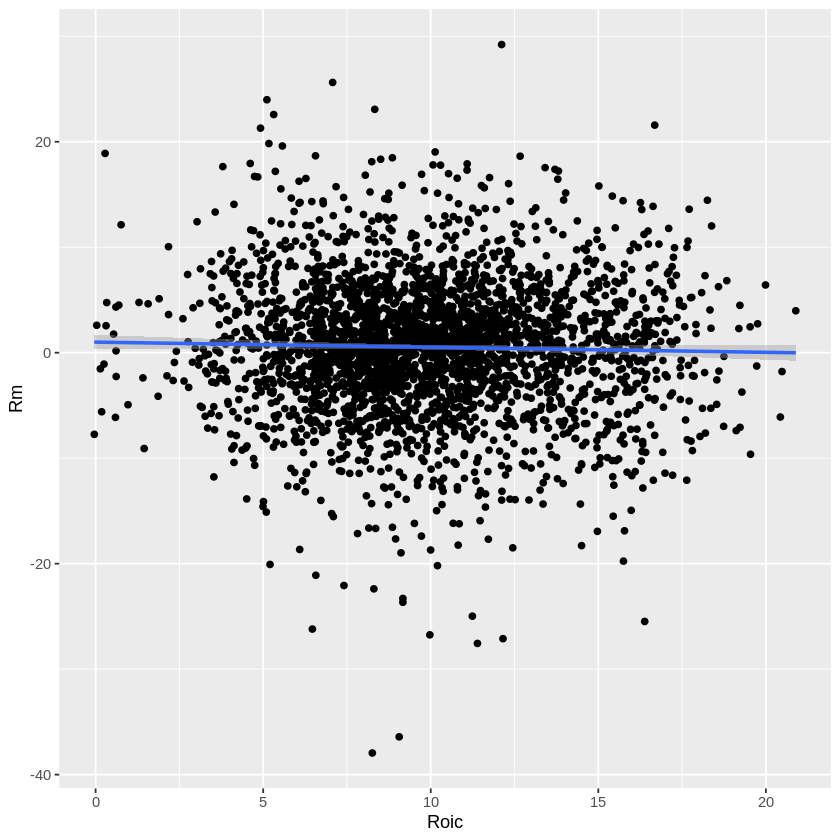

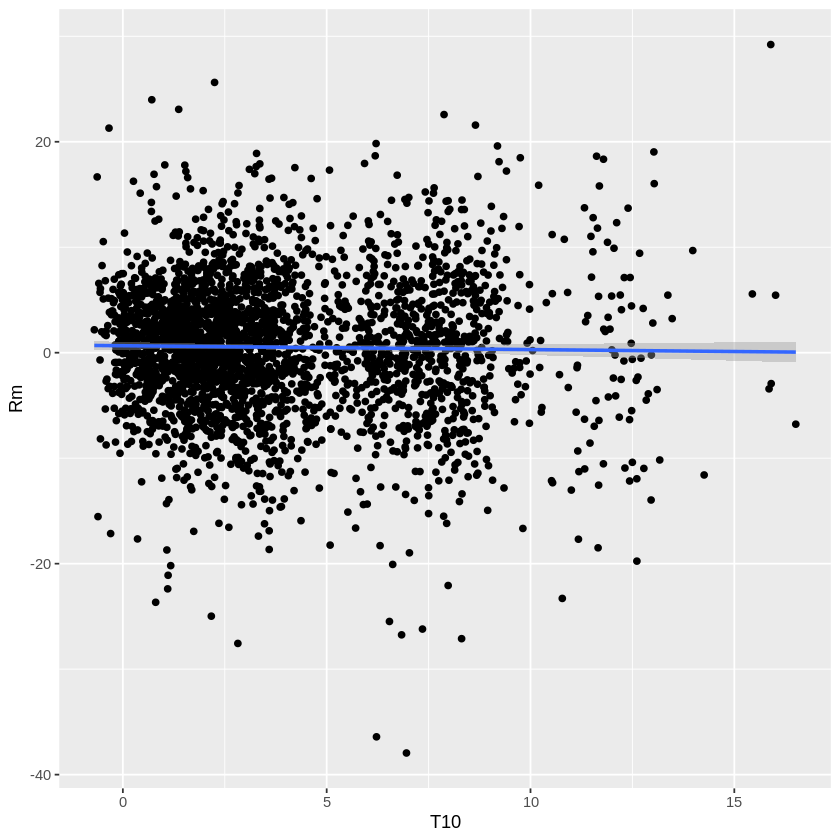

In [19]:
require(ggplot2)
ggplot(rdf2,aes(Vol,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(Fecha,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(País,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(CobIn,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(EPS,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(Estab,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(Pe,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(Peg,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(Psa,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(Pt,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(RevEar,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(Rm,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(Roa,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(Roic,Rm)) + geom_point() +stat_smooth(method="lm")
ggplot(rdf2,aes(T10,Rm)) + geom_point() +stat_smooth(method="lm")


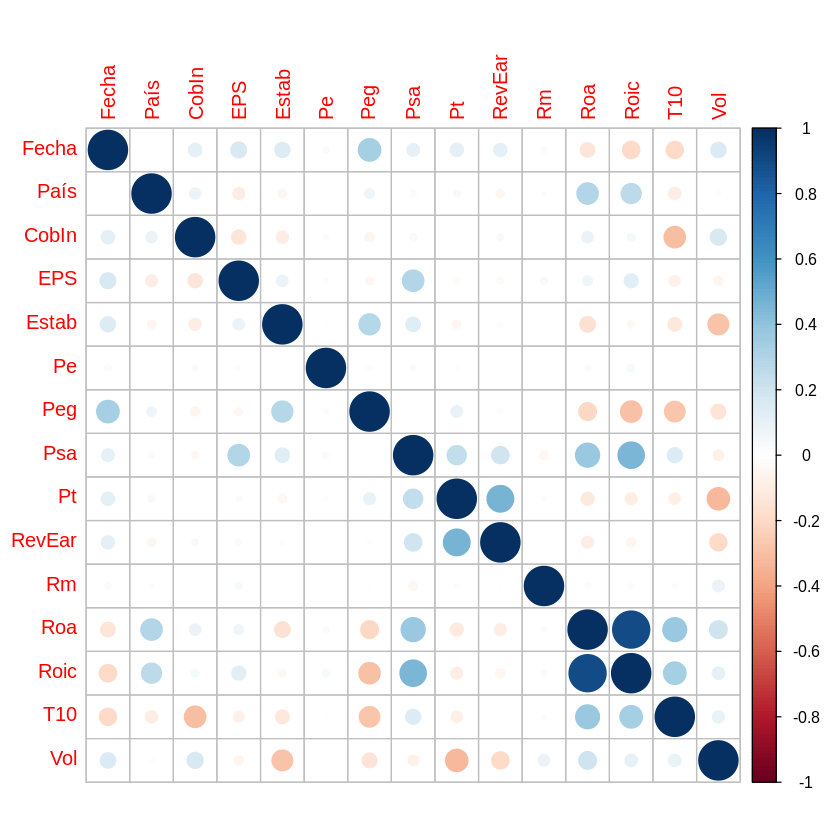

In [23]:
corrplot(cor(rdf2), method = "circle")

In [24]:
rdf3<- scale(rdf2)

In [25]:
head(rdf3)

Fecha    País       CobIn      EPS        Estab      Pe           Peg       
1 1.724576 -1.7048369 -0.2681513  0.2134284 -0.1258369 -0.016075225 -0.2048704
2 1.724576 -1.5042679 -0.3284746  2.9357498 -0.5917974  0.004638019  2.0963498
3 1.724576 -1.3036988 -0.6076427  0.3270727 -0.9814049 -0.028959840 -1.1509399
4 1.724576 -1.1031298  0.3398651  1.8496916  1.1269375 -0.019995626 -0.6881172
5 1.724576 -0.9025607 -0.5346907 -0.1607038 -1.0337784 -0.032139741 -0.7460781
6 1.724576 -0.7019917  1.8878782 -0.1256876 -0.6619700  0.028844934 -0.6913259
  Psa        Pt          RevEar     Rm          Roa        Roic       
1 -1.0980421 -1.46043942 -0.0434398 -0.36298254 -0.4241598 -0.46936285
2  0.4847322 -1.86481446 -0.2032229 -0.02262936  1.1227357  0.64833134
3 -0.7105349 -1.12166340  0.2428949 -0.63438475  1.7503418  1.75500636
4  0.6253768 -1.59338663 -1.2136173 -0.33215582 -1.7368184 -0.02065008
5 -1.1550871  0.05452215  2.3319617 -0.44611635  0.8574944  0.38326112
6  1.4052172 -1.39894955 -0.2250580 -0.16501015  1.8061726  1.52008268
  T10         Vol       
1 -0.79077120  0.5906261
2 -0.05501787  0.3416950
3  3.07551311  0.4860109
4 -0.20415706 -0.7334003
5  0.85970248  0.5715980
6 -0.33324531  1.7913013

In [26]:
rdf4 <-as.data.frame(rdf3)

## partición

In [27]:
set.seed(2)
ind_train <- partition(1:nrow(rdf4), p=c(0.8, 0.2))
data.train <- rdf4[ind_train$`1`,]
data.test <- rdf4[ind_train$`2`,]

In [63]:
#mtcars[, !names(mtcars) %in% c("carb", "mpg")] 


X_train <- data.train[, !names(data.train) %in% c("Roa")]
y_train <-data.train$Roa
X_test <- data.test[, !names(data.train) %in% c("Roa")]
y_test <-data.test$Roa
head(X_test)

Fecha    País       CobIn       EPS        Estab      Pe           
2  1.724576 -1.5042679 -0.32847460  2.9357498 -0.5917974  0.0046380191
3  1.724576 -1.3036988 -0.60764271  0.3270727 -0.9814049 -0.0289598396
11 1.724576  0.1002845 -0.00853811  0.5339814  0.5076076  0.0325859317
24 1.724576 -1.1031298  2.13306093  1.5154744  1.1988058 -0.0152124911
33 1.724576  0.5014226  7.56774953 -1.2836977  0.2560876  0.0001731532
36 1.724576  0.9025607 -0.26006245  0.3164186 -0.6352076  0.0060036183
   Peg        Psa        Pt         RevEar       Rm          Roic       
2   2.0963498  0.4847322 -1.8648145 -0.203222891 -0.02262936  0.64833134
3  -1.1509399 -0.7105349 -1.1216634  0.242894879 -0.63438475  1.75500636
11  0.3599220  1.8276719 -1.3974779 -0.762180952  0.31615131  1.15625944
24 -0.5971449  0.9937619 -1.4794466 -1.267507941 -1.70936305 -0.04416441
33  0.5957536 -0.9184380 -0.8570836 -0.005239367 -1.18709437 -0.17087699
36 -1.4170747  1.5621233  1.7743340  2.513495166 -1.17096702  0.23256097
   T10         Vol       
2  -0.05501787  0.3416950
3   3.07551311  0.4860109
11  1.20769392  0.6297411
24 -0.30358319 -0.9275271
33 -1.19178991  0.5162079
36  0.26679135  0.4613591

In [28]:
head(data.train)

Fecha    País       CobIn       EPS        Estab       Pe          
1 1.724576 -1.7048369 -0.26815129  0.2134284 -0.12583692 -0.016075225
4 1.724576 -1.1031298  0.33986508  1.8496916  1.12693753 -0.019995626
5 1.724576 -0.9025607 -0.53469074 -0.1607038 -1.03377839 -0.032139741
6 1.724576 -0.7019917  1.88787825 -0.1256876 -0.66197000  0.028844934
7 1.724576 -0.5014226 -0.60821284  1.6210109 -0.40344052 -0.030214555
8 1.724576 -0.5014226  0.02205206  0.1502034  0.02056194  0.003794461
  Peg        Psa        Pt          RevEar     Rm         Roa       
1 -0.2048704 -1.0980421 -1.46043942 -0.0434398 -0.3629825 -0.4241598
4 -0.6881172  0.6253768 -1.59338663 -1.2136173 -0.3321558 -1.7368184
5 -0.7460781 -1.1550871  0.05452215  2.3319617 -0.4461164  0.8574944
6 -0.6913259  1.4052172 -1.39894955 -0.2250580 -0.1650101  1.8061726
7 -0.4511443 -0.8888657  0.33313449  0.8301316 -0.7998292 -0.3344833
8  0.1752303 -0.4138124 -0.66351496  1.9263898 -0.1247838  0.3319335
  Roic        T10        Vol       
1 -0.46936285 -0.7907712  0.5906261
4 -0.02065008 -0.2041571 -0.7334003
5  0.38326112  0.8597025  0.5715980
6  1.52008268 -0.3332453  1.7913013
7 -0.31852044  2.5784488  2.1645349
8  0.35903521 -0.6184326  0.3668984

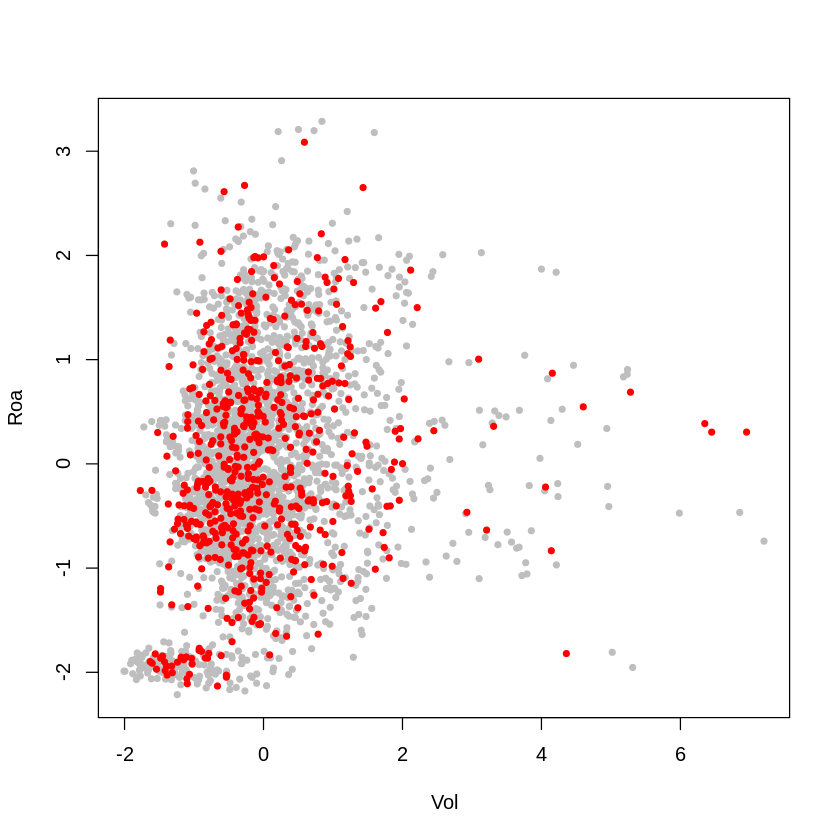

In [29]:
plot(Roa~Vol, pch=20, col="gray", data=data.train)
points(Roa~Vol, pch=20, col="red", data=data.test)

In [30]:
dim(data.train)
dim(data.test )

[1] 2383   15

[1] 597  15

Se utilizará **RMSE** ->Error de raíz cuadrada media, y se elegirá el que tenga menor  para comparar y seleccionar los modelos.

In [54]:
mod1=lm(Roa~., data=rdf4)
mod1
summary(mod1)

mod0=lm(Roa~Vol, data=rdf4)
mod0
summary(mod0)


Call:
lm(formula = Roa ~ ., data = rdf4)

Coefficients:
(Intercept)        Fecha         País        CobIn          EPS        Estab  
 -6.140e-16    2.143e-02    6.325e-02    6.523e-02   -7.350e-03   -1.203e-01  
         Pe          Peg          Psa           Pt       RevEar           Rm  
  1.160e-03    1.240e-01   -4.724e-03   -9.098e-03   -2.375e-02   -6.000e-03  
       Roic          T10          Vol  
  8.637e-01    1.281e-01    6.482e-02  



Call:
lm(formula = Roa ~ ., data = rdf4)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1846 -0.1461  0.0417  0.2415  1.0266 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.140e-16  7.112e-03   0.000  1.00000    
Fecha        2.143e-02  8.439e-03   2.540  0.01115 *  
País         6.325e-02  7.767e-03   8.143 5.63e-16 ***
CobIn        6.523e-02  8.000e-03   8.154 5.12e-16 ***
EPS         -7.350e-03  8.012e-03  -0.917  0.35903    
Estab       -1.203e-01  8.065e-03 -14.919  < 2e-16 ***
Pe           1.160e-03  7.131e-03   0.163  0.87076    
Peg          1.240e-01  8.462e-03  14.652  < 2e-16 ***
Psa         -4.724e-03  9.224e-03  -0.512  0.60858    
Pt          -9.098e-03  8.881e-03  -1.024  0.30574    
RevEar      -2.375e-02  8.219e-03  -2.890  0.00388 ** 
Rm          -6.000e-03  7.190e-03  -0.834  0.40411    
Roic         8.637e-01  9.792e-03  88.200  < 2e-16 ***
T10          1.281e-01  8.634e-03  14.839  < 2e-16 ***
Vol          6.482e-02  


Call:
lm(formula = Roa ~ Vol, data = rdf4)

Coefficients:
(Intercept)          Vol  
  9.228e-17    2.041e-01  



Call:
lm(formula = Roa ~ Vol, data = rdf4)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0377 -0.6414 -0.0481  0.6722  3.1453 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.228e-17  1.794e-02    0.00        1    
Vol         2.041e-01  1.794e-02   11.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9791 on 2978 degrees of freedom
Multiple R-squared:  0.04165,	Adjusted R-squared:  0.04133 
F-statistic: 129.4 on 1 and 2978 DF,  p-value: < 2.2e-16


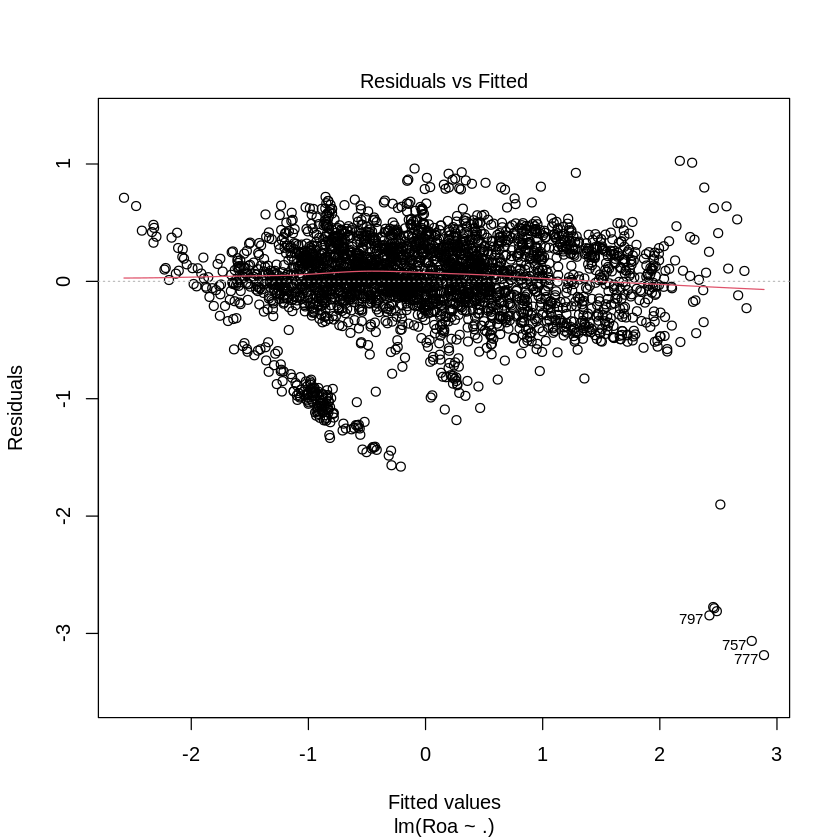

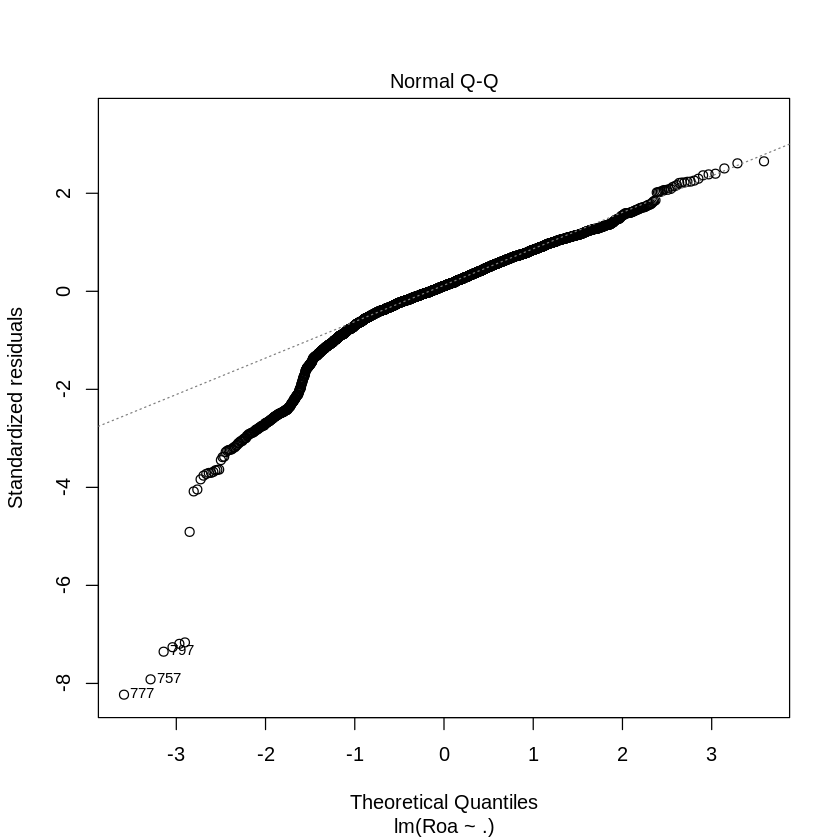

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


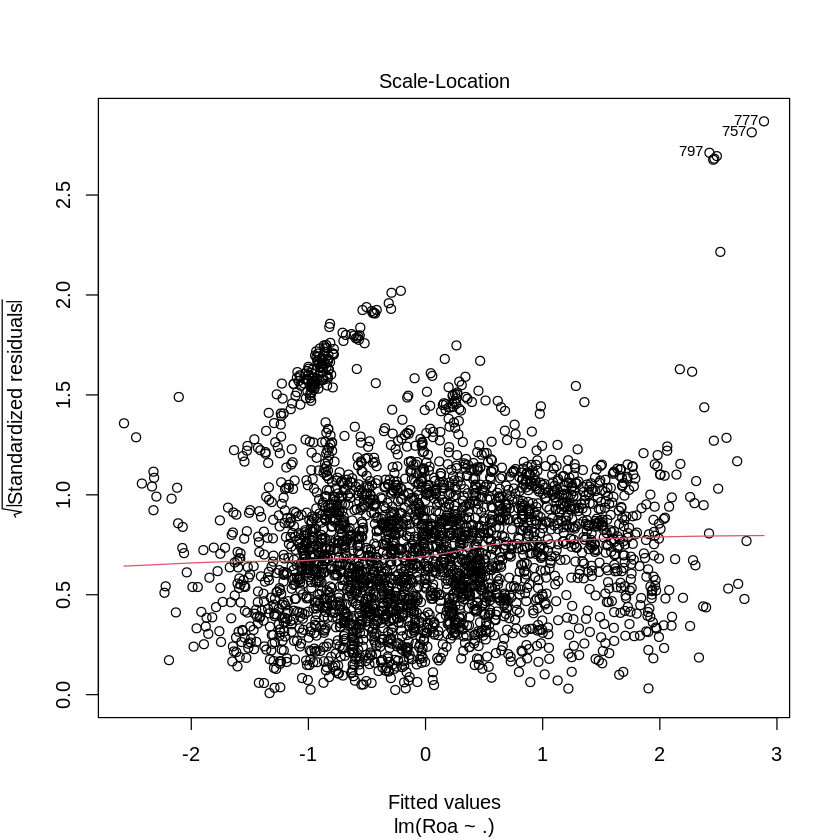

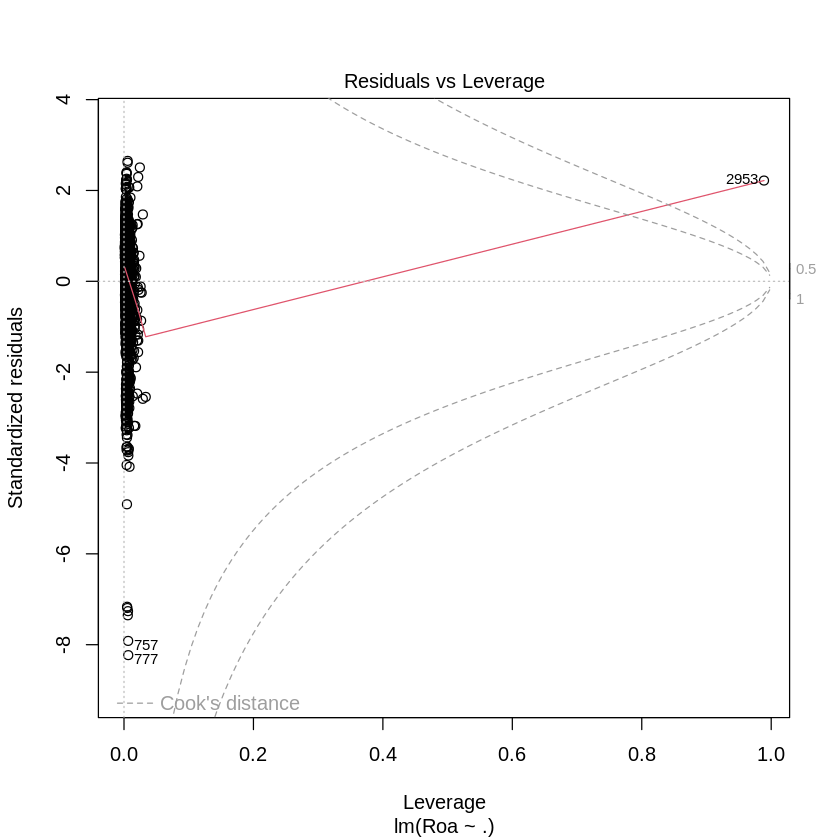

In [32]:
plot(mod1)

In [34]:
?step
mod1.step=step(mod1)
mod1.step2=step(mod1, k=log(length(rdf3$Roa)))
mod1.step3=step(mod1, scope=list(lower=mod0, upper=mod2), direction="both")

summary(mod1.step)
summary(mod1.step2)
summary(mod1.step3)

Start:  AIC=-5623.95
Roa ~ Fecha + País + CobIn + EPS + Estab + Pe + Peg + Psa + 
    Pt + RevEar + Rm + Roic + T10 + Vol

         Df Sum of Sq     RSS     AIC
- Pe      1      0.00  446.92 -5625.9
- Psa     1      0.04  446.96 -5625.7
- Rm      1      0.10  447.02 -5625.3
- EPS     1      0.13  447.05 -5625.1
- Pt      1      0.16  447.08 -5624.9
<none>                 446.92 -5624.0
- Fecha   1      0.97  447.89 -5619.5
- RevEar  1      1.26  448.18 -5617.6
- Vol     1      8.68  455.60 -5568.6
- País    1      9.99  456.91 -5560.0
- CobIn   1     10.02  456.94 -5559.9
- Peg     1     32.36  479.28 -5417.6
- T10     1     33.19  480.11 -5412.5
- Estab   1     33.55  480.47 -5410.2
- Roic    1   1172.58 1619.50 -1789.2

Step:  AIC=-5625.93
Roa ~ Fecha + País + CobIn + EPS + Estab + Peg + Psa + Pt + 
    RevEar + Rm + Roic + T10 + Vol

         Df Sum of Sq     RSS     AIC
- Psa     1      0.04  446.96 -5627.7
- Rm      1      0.10  447.03 -5627.2
- EPS     1      0.13  447.05 -5627.1

ERROR: ignored

Fecha     País    CobIn      EPS    Estab       Pe      Peg      Psa 
1.407506 1.192406 1.264761 1.268786 1.285463 1.004865 1.415220 1.681606 
      Pt   RevEar       Rm     Roic      T10      Vol 
1.558969 1.335101 1.021811 1.895072 1.473378 1.442263

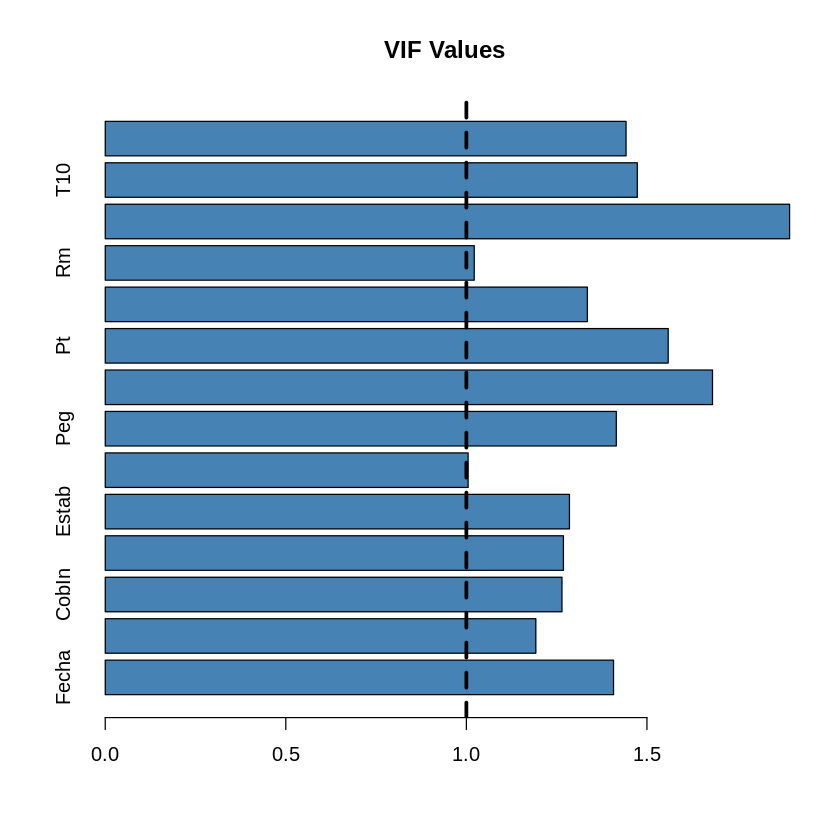

In [55]:
#calculate the VIF for each predictor variable in the model
vif(mod1)
#create vector of VIF values
vif_values <- vif(mod1)

#create horizontal bar chart to display each VIF value
barplot(vif_values, main = "VIF Values", horiz = TRUE, col = "steelblue")

#add vertical line at 1
abline(v = 1, lwd = 3, lty = 2)

In [69]:

#data.test$predictions <- test_data_prediction

pred <-predict(mod1,newdata=data.frame(X_test))
head(pred)


2          3         11         24         33         36 
 0.8246291  1.8407187  1.2368864 -0.2111363  0.3673919  0.1642389

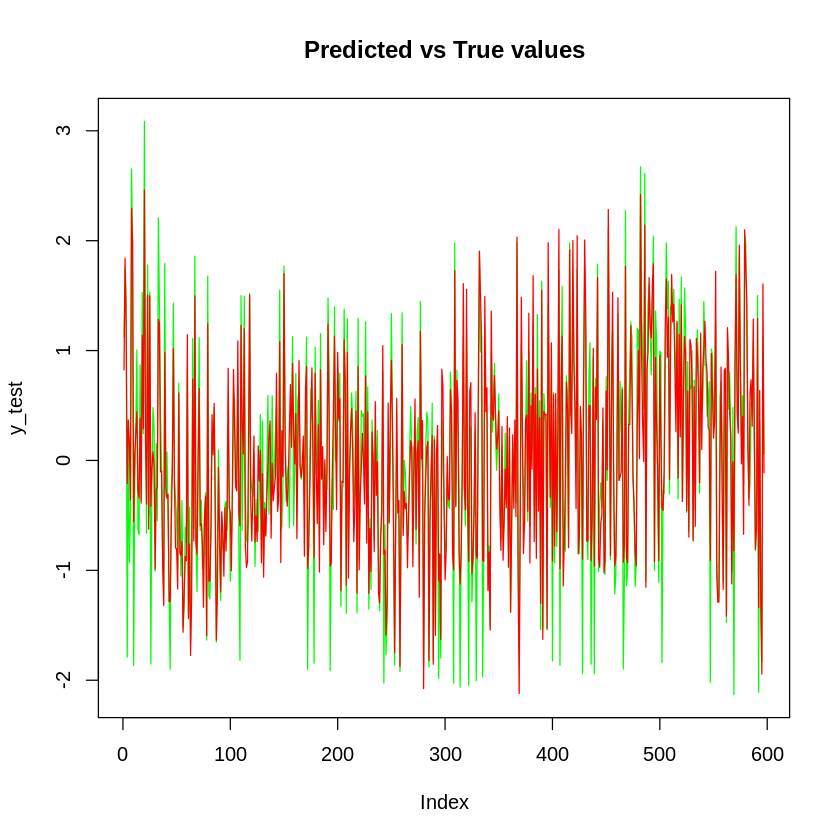

In [71]:
plot(y_test, col = "green", type = "l", main = "Predicted vs True values")
lines(pred, col = "red", type = "l")

In [72]:
# linear regression with k = 5
trControl <- trainControl(method = "cv", number = 5)
set.seed(333)
fitlm <- train(Roa~., data= data.train, method = "lm", trControl = trControl)
fitlm

Linear Regression 

2383 samples
  14 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1907, 1906, 1907, 1906, 1906 
Resampling results:

  RMSE       Rsquared   MAE      
  0.4789708  0.7904912  0.2802185

Tuning parameter 'intercept' was held constant at a value of TRUE

In [151]:
head(data.train[,-11],data.train[,11])

Fecha    País       CobIn       EPS        Estab       Pe          
1 1.724576 -1.7048369 -0.26815129  0.2134284 -0.12583692 -0.016075225
4 1.724576 -1.1031298  0.33986508  1.8496916  1.12693753 -0.019995626
5 1.724576 -0.9025607 -0.53469074 -0.1607038 -1.03377839 -0.032139741
6 1.724576 -0.7019917  1.88787825 -0.1256876 -0.66197000  0.028844934
7 1.724576 -0.5014226 -0.60821284  1.6210109 -0.40344052 -0.030214555
8 1.724576 -0.5014226  0.02205206  0.1502034  0.02056194  0.003794461
  Peg        Psa        Pt          RevEar     Roa        Roic       
1 -0.2048704 -1.0980421 -1.46043942 -0.0434398 -0.4241598 -0.46936285
4 -0.6881172  0.6253768 -1.59338663 -1.2136173 -1.7368184 -0.02065008
5 -0.7460781 -1.1550871  0.05452215  2.3319617  0.8574944  0.38326112
6 -0.6913259  1.4052172 -1.39894955 -0.2250580  1.8061726  1.52008268
7 -0.4511443 -0.8888657  0.33313449  0.8301316 -0.3344833 -0.31852044
8  0.1752303 -0.4138124 -0.66351496  1.9263898  0.3319335  0.35903521
  T10        Vol       
1 -0.7907712  0.5906261
4 -0.2041571 -0.7334003
5  0.8597025  0.5715980
6 -0.3332453  1.7913013
7  2.5784488  2.1645349
8 -0.6184326  0.3668984

In [73]:
modknn <- knnreg(data.train[,-11],data.train[,11],k =70)
summary(modknn)
str(modknn)

        Length Class  Mode   
learn   2      -none- list   
k       1      -none- numeric
theDots 0      -none- list   

List of 3
 $ learn  :List of 2
  ..$ y: num [1:2383] -0.363 -0.332 -0.446 -0.165 -0.8 ...
  ..$ X:'data.frame':	2383 obs. of  14 variables:
  .. ..$ Fecha : num [1:2383] 1.72 1.72 1.72 1.72 1.72 ...
  .. ..$ País  : num [1:2383] -1.705 -1.103 -0.903 -0.702 -0.501 ...
  .. ..$ CobIn : num [1:2383] -0.268 0.34 -0.535 1.888 -0.608 ...
  .. ..$ EPS   : num [1:2383] 0.213 1.85 -0.161 -0.126 1.621 ...
  .. ..$ Estab : num [1:2383] -0.126 1.127 -1.034 -0.662 -0.403 ...
  .. ..$ Pe    : num [1:2383] -0.0161 -0.02 -0.0321 0.0288 -0.0302 ...
  .. ..$ Peg   : num [1:2383] -0.205 -0.688 -0.746 -0.691 -0.451 ...
  .. ..$ Psa   : num [1:2383] -1.098 0.625 -1.155 1.405 -0.889 ...
  .. ..$ Pt    : num [1:2383] -1.4604 -1.5934 0.0545 -1.3989 0.3331 ...
  .. ..$ RevEar: num [1:2383] -0.0434 -1.2136 2.332 -0.2251 0.8301 ...
  .. ..$ Roa   : num [1:2383] -0.424 -1.737 0.857 1.806 -0.334 ...
  .. ..$ Roic  : num [1:2383] -0.4694 -0.0207 0.3833 1.5201 -0.3185 ...
  .. ..$ T10   : num [1:2383] -0.791 -0.204 

In [161]:
pred_y = predict(modknn, data.frame(data.test[,11]))

ERROR: ignored

In [160]:
head(data.frame(data.test[,11]))

data.test...11.
1 -0.02262936    
2 -0.63438475    
3  0.31615131    
4 -1.70936305    
5 -1.18709437    
6 -1.17096702

In [157]:
print(data.frame(data.test[,11], pred_y))

mse = mean((data.test[,11] - pred_y)^2)
mae = caret::MAE(data.test[,11], pred_y)
rmse = caret::RMSE(data.test[,11], pred_y)

cat("MSE: ", mse, "MAE: ", mae, " RMSE: ", rmse)

ERROR: ignored

In [120]:
# knn with k = 5
trControl <- trainControl(method = "cv", number = 5)
set.seed(333)
fitknn <- train(Rm~., data= data.train, tuneGrid = expand.grid(k=1:70),method = "knn", trControl = trControl)
fitknn

k-Nearest Neighbors 

2383 samples
  14 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1589, 1590, 1587 
Resampling results across tuning parameters:

  k   RMSE      Rsquared     MAE      
   1  1.360884  0.001621421  1.0223711
   2  1.201399  0.002261293  0.9036518
   3  1.121594  0.002969439  0.8413100
   4  1.103954  0.002107764  0.8251285
   5  1.085029  0.002578345  0.8067591
   6  1.069432  0.004082150  0.7931305
   7  1.063227  0.004273744  0.7900033
   8  1.052113  0.004769290  0.7808357
   9  1.045146  0.003694152  0.7751255
  10  1.040775  0.003737671  0.7727050
  11  1.037382  0.003212536  0.7691797
  12  1.037189  0.002516131  0.7681052
  13  1.033935  0.002860480  0.7652201
  14  1.030863  0.003425738  0.7631110
  15  1.028652  0.003505669  0.7607273
  16  1.028639  0.002803845  0.7601250
  17  1.028187  0.002543046  0.7591566
  18  1.027387  0.002577840  0.7597954
  19  1.025849  0.002703303  0.7592564
  20  1.025148  0.002989

ERROR: ignored

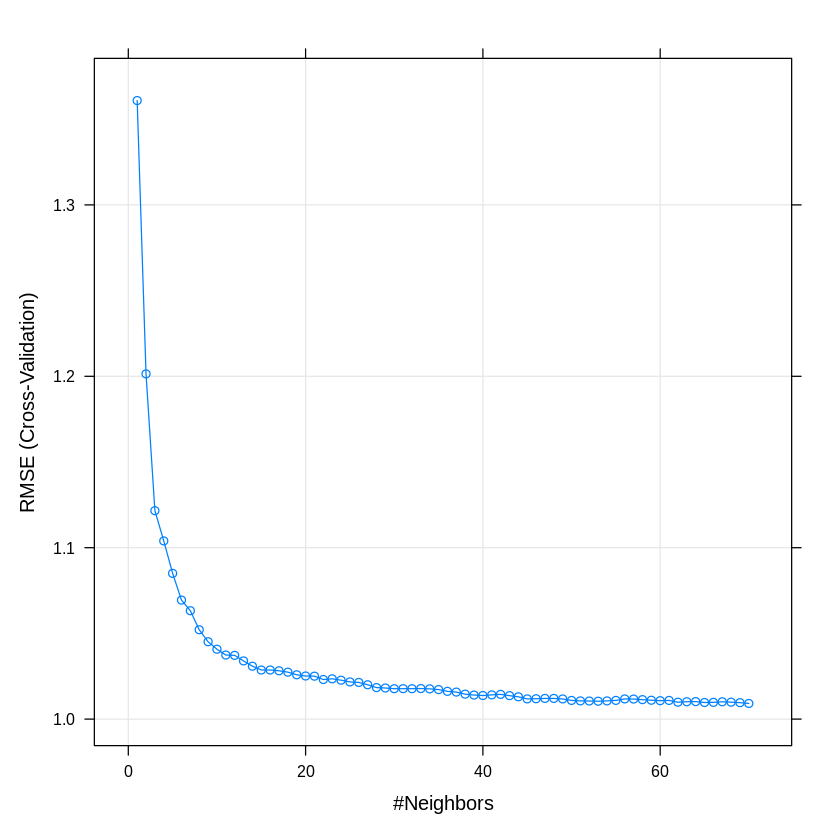

In [108]:
test <- data.test
pred <-predict(fitknn,newdata=data.test)
plot(fitknn)
varImp(fitknn)


In [132]:
fitknn$finalModel


70-nearest neighbor regression model

In [107]:
RMSE(pred,data.test$Rm )
plot(pred,data.test$Rm )

ERROR: ignored

## 1.2 Seleccione alguna de las medidas de desempeño que pueda ser utilizada a este conjunto de datos. Indique el criterio utilizado.


## 1.3 Utilizando la muestra de entrenamiento, junto con la validación cruzada k-fold (para algún k seleccionado por usted) y la medida de desempeño escogida, compare el modelo de regresión lineal y el k-NN. ¿Cuál de los métodos tiene el mejor resultado, según la validación cruzada k-fold?

In [ ]:
# linear regression with k = 3
trControl <- trainControl(method = "cv", number = 3)
set.seed(333)
fitlm <- train(involact~., data= data.train, method = "lm", trControl = trControl)
fitlm


Linear Regression 

37 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 24, 25, 25 
Resampling results:

  RMSE       Rsquared   MAE      
  0.4816685  0.5240542  0.3431864

Tuning parameter 'intercept' was held constant at a value of TRUE

In [ ]:
# knn with k = 3
trControl <- trainControl(method = "cv", number = 3)
set.seed(333)
fitknn <- train(involact~., data= data.train, tuneGrid = expand.grid(k=1:70),method = "knn", trControl = trControl, preProc = c("center", "scale"))
fitknn

Warning message in knnregTrain(train = structure(c(-0.448156490547848, -0.526292743719644, :
“k = 25 exceeds number 24 of patterns”
Warning message in knnregTrain(train = structure(c(-0.448156490547848, -0.526292743719644, :
“k = 26 exceeds number 24 of patterns”
Warning message in knnregTrain(train = structure(c(-0.448156490547848, -0.526292743719644, :
“k = 27 exceeds number 24 of patterns”
Warning message in knnregTrain(train = structure(c(-0.448156490547848, -0.526292743719644, :
“k = 28 exceeds number 24 of patterns”
Warning message in knnregTrain(train = structure(c(-0.448156490547848, -0.526292743719644, :
“k = 29 exceeds number 24 of patterns”
Warning message in knnregTrain(train = structure(c(-0.448156490547848, -0.526292743719644, :
“k = 30 exceeds number 24 of patterns”
Warning message in knnregTrain(train = structure(c(-0.448156490547848, -0.526292743719644, :
“k = 31 exceeds number 24 of patterns”
Warning message in knnregTrain(train = structure(c(-0.448156490547848, -0.52

k-Nearest Neighbors 

37 samples
 6 predictor

Pre-processing: centered (6), scaled (6) 
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 24, 25, 25 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   1  0.5410233  0.5837141  0.3732906
   2  0.4185748  0.6107329  0.2972222
   3  0.3822836  0.6603532  0.2815527
   4  0.4124864  0.6264202  0.2981303
   5  0.4171048  0.6222855  0.3182051
   6  0.3820980  0.6761884  0.2925926
   7  0.3969783  0.6400515  0.3163919
   8  0.4140324  0.6037733  0.3355858
   9  0.4110297  0.6228104  0.3339269
  10  0.4209806  0.6014594  0.3436966
  11  0.4242783  0.6147717  0.3479798
  12  0.4457229  0.5739332  0.3702279
  13  0.4512891  0.5752528  0.3737344
  14  0.4578285  0.5727600  0.3746490
  15  0.4706572  0.5758970  0.3843447
  16  0.4794506  0.5684324  0.3850294
  17  0.4951405  0.5437791  0.3959527
  18  0.5041272  0.5763572  0.3994539
  19  0.5282424  0.5831635  0.4206590
  20  0.5461342  0.5812656  0.

loess r-squared variable importance

       Overall
fire   100.000
volact  76.035
race    63.775
income  60.826
theft    5.169
age      0.000

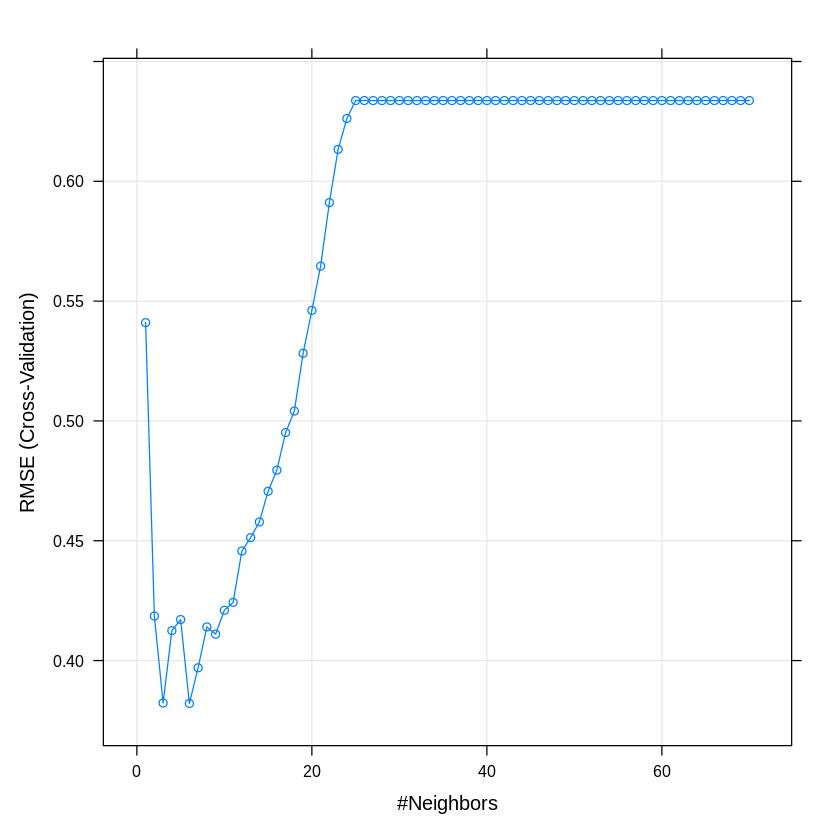

In [ ]:
plot(fitknn)
varImp(fitknn)

## selección de modelo de acuerdo a RMSE Y R2

**knn con k = 6**

   - RMSE =  0.3820980 

   - Rsquared = 0.6761884 

**linear regression**

   - RMSE =  0.4816685      
   - Rsquared  = 0.5240542 


**Por lo tanto se selecciona knn con k= 6**

## Para el modelo seleccionado en el paso anterior, ajuste los parámetros con toda la muestra de entrenamiento y utilice la muestra test para medir la calidad del ajuste. Comente los resultados

In [ ]:
test <- scale(data.test)
pred <-predict(fitknn,newdata=data.test)
pred
data.test
plot(fitknn)
varImp(fitknn)


[1] 0.60000000 0.08333333 0.00000000 0.48333333 1.28333333 0.15000000
 [7] 1.56666667 1.33333333 0.61666667 0.13333333

race fire theft age  volact involact income
60626 10.0  6.2 29    60.4  5.3   0.0      11744 
60611  4.9 11.0 75    42.6  7.9   0.0      21480 
60656  1.7  2.0 11     7.7 10.9   0.0      13686 
60639  2.5  7.2 29    84.2  8.5   0.2      11084 
60624 94.4 18.4 32    72.9  1.2   1.8       7342 
60632  4.4  5.6 23    71.5  8.0   0.3      11230 
60609 46.2 21.8  4    73.1  2.6   1.3       8330 
60636 48.8 28.6 27    78.1  4.0   1.4       9742 
60649 66.1 10.7 43    67.5  3.1   0.4      10908 
60627 47.4  7.0  3    11.4  7.7   0.2      10080

### el rmse es mas bajo que en kfolds y se ve que se ajusta de buena manera a los datos de test.

[1] 0.2938726

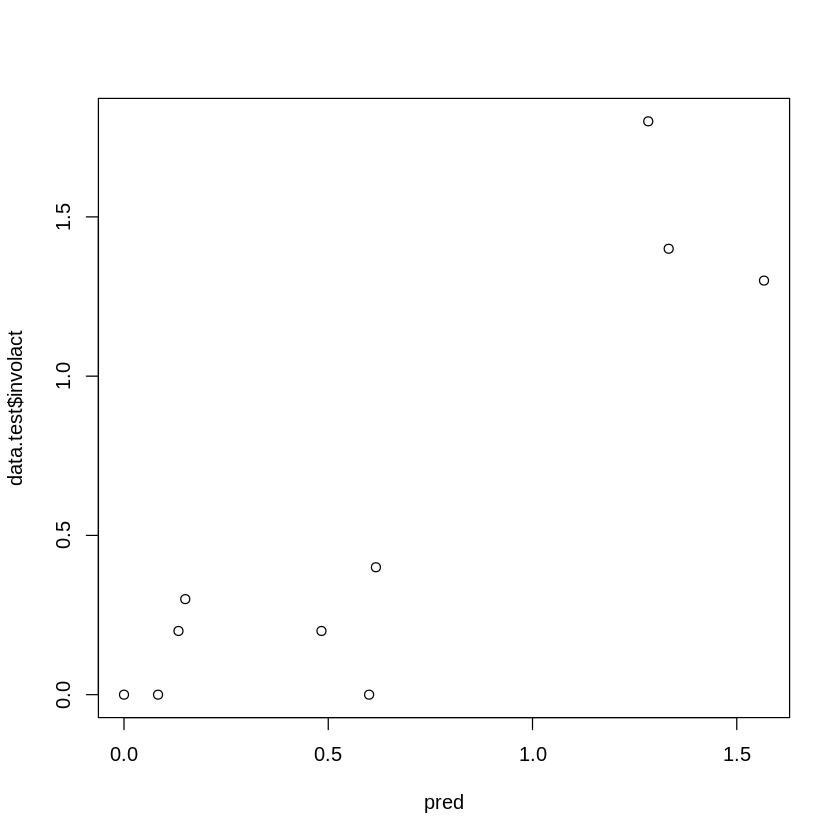

In [ ]:
RMSE(pred,data.test$involact )
plot(pred,data.test$involact )

In [ ]:
fitknn$finalModel
RMSE(pred,data.test$involact )
plot(pred,data.test$involact )

6-nearest neighbor regression model

# **Pregunta parte 2**:  
Utilice el conjunto de datos “wbca” disponibles en la libreria“faraway”. Además, considere Y = Class como la variable respuesta, todas las demás serán variables explicativas.


## **2.1**:
 Realizar una separación aleatoria de la data original, donde la muestra de entrenamiento considera el 80% y la muestra test considera el 20%. Reservar la muestra test para el final.


In [ ]:
# Cargar y comprender datos iniciales
?wbca
head(wbca)
names(wbca)
dim(wbca)
#plot(faraway::wbca)

Class Adhes BNucl Chrom Epith Mitos NNucl Thick UShap USize
1 1     1      1    3     2     1     1     5      1     1   
2 1     5     10    3     7     1     2     5      4     4   
3 1     1      2    3     2     1     1     3      1     1   
4 1     1      4    3     3     1     7     6      8     8   
5 1     3      1    3     2     1     1     4      1     1   
6 0     8     10    9     7     1     7     8     10    10

[1] "Class" "Adhes" "BNucl" "Chrom" "Epith" "Mitos" "NNucl" "Thick" "UShap"
[10] "USize"

[1] 681  10

In [ ]:
faraway::vif(data.train)
# se descarta USize y UShap con vif>=7


race     fire    theft      age   volact involact   income 
4.228554 4.538362 2.522047 2.746302 7.771563 3.582736 8.112387

In [ ]:
wbca_vif <- wbca[,-c(9,10)]
#wbca_vif <- wcbac[]
head(wbca_vif)

Class Adhes BNucl Chrom Epith Mitos NNucl Thick
1 1     1      1    3     2     1     1     5    
2 1     5     10    3     7     1     2     5    
3 1     1      2    3     2     1     1     3    
4 1     1      4    3     3     1     7     6    
5 1     3      1    3     2     1     1     4    
6 0     8     10    9     7     1     7     8

In [ ]:
set.seed(2)
ind_train <- partition(1:nrow(wbca_vif), p=c(0.8, 0.2))
data.train <- wbca_vif[ind_train$`1`,]
data.test <- wbca_vif[ind_train$`2`,]

In [ ]:
dim(data.train)
dim(data.test)

[1] 542   8

[1] 139   8

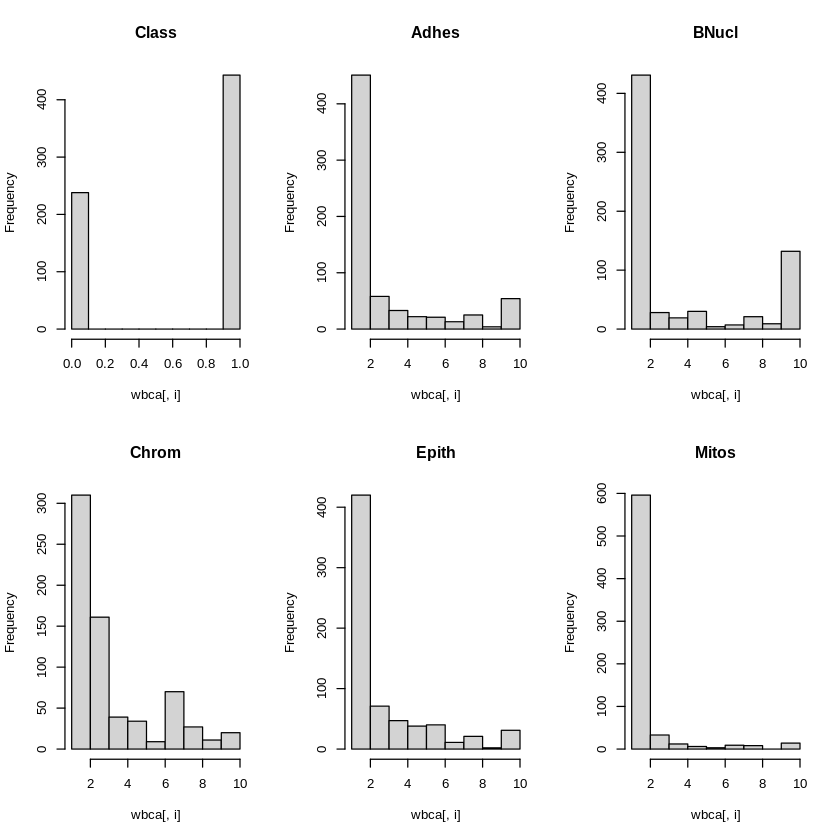

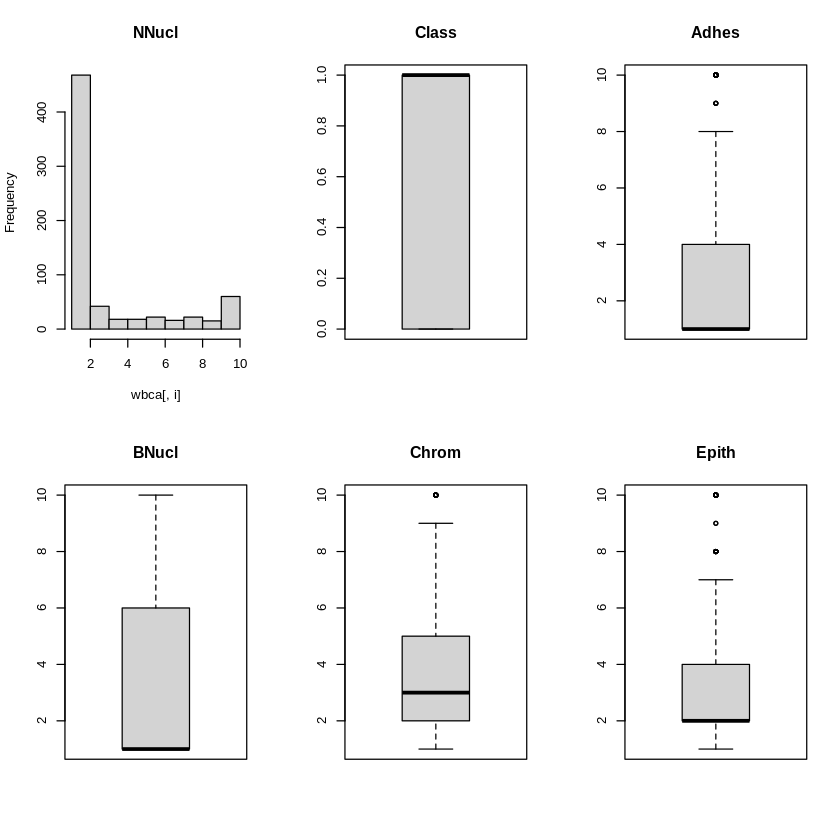

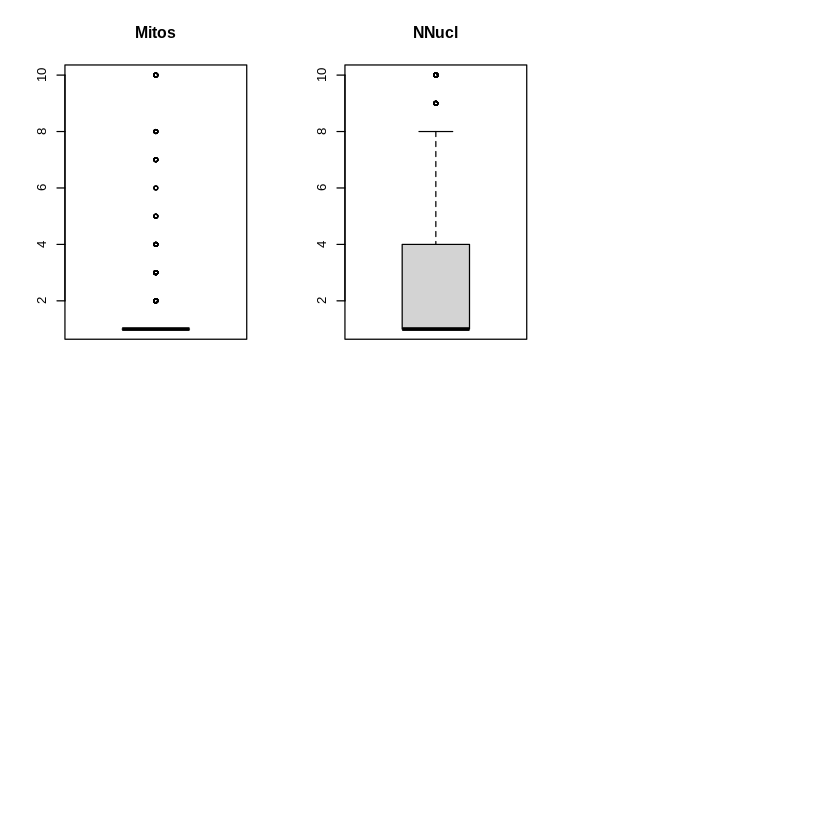

In [ ]:
par(mfrow=c(2,3))
for(i in 1:7)hist(wbca[,i],main=names(wbca)[i])
for(i in 1:7)boxplot(wbca[,i],main=names(wbca)[i])
# se observa que la distribución de las covariables no es normal.

## **2.2**:
De acuerdo al contexto del conjunto de datos, seleccione alguna de las medidas de desempeño vistas en clase (Tasa de Error, Exactitud, Precisión, Sensibilidad, Especificidad, F1-Score o FβScore). Explique la elección de la medida de desempeño escogida.


Dado que intentamos resolver un problema de clasificación, Tumor benigno o maligno, las métricas a utilizar serían la precisión , recall, F1, F beta y apoyarse en la matriz de confusión que para este problema se busca reducir los falsos negativos. 

Es por ello que seleccionamos la métrica F1 la cual combina la precisión y el recall lo que facilita el análisis. 

No escogemos la precisión ya que como se discutió en clases puede resultar una métrica engañosa en modelos que se pudieran considerar malos.

F1-SCORE ya que conjuga la sensibilidad y la precisión en un único indicador

## **2.3**
Utilizando la muestra de entrenamiento, junto con la validaci´on cruzada k-fold (para algún k seleccionado por usted) y la medida de desempeño escogida, compare los modelos de regresión logística, naive-bayes (usted escoga el tipo de marginal), analisis discriminante lineal y cuadrático.
¿Cuál de los métodos tiene el mejor resultado, según la validación cruzada k-fold?


## intento manual con k = 3 naive bayes

In [ ]:
part1=data.train[1:180,]    # se seleccionan las filas de la primera particion
part2=data.train[181:360,]  # se seleccionan las filas de la segunda particion
part3=data.train[361:542,]  # se seleccionan las filas de la tercera particion


In [ ]:

nb.part1= naive_bayes(as.character(Class)~., data=data.train[-c(1:180),] ,usekernel = TRUE)
nb.part2= naive_bayes(as.character(Class)~., data=data.train[-c(181:360),], usekernel = TRUE)
nb.part3= naive_bayes(as.character(Class)~., data=data.train[-c(361:542),], usekernel = TRUE)


In [ ]:
prednb.part1=predict(nb.part1, data.train[1:180,-1] )
prednb.part2=predict(nb.part2, data.train[181:360,-1])
prednb.part3=predict(nb.part3, data.train[361:542,-1])

In [ ]:
cfm11 <- confusionMatrix(prednb.part1,as.factor(data.train[1:180,1]),mode = "everything", positive="1" )
cfm12 <- confusionMatrix(prednb.part2,as.factor(data.train[181:360,1]),mode = "everything", positive="1" )
cfm13 <- confusionMatrix(prednb.part3,as.factor(data.train[361:542,1]),mode = "everything", positive="1" )
cfm11
cfm12
cfm13

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 73  4
         1  8 95
                                          
               Accuracy : 0.9333          
                 95% CI : (0.8864, 0.9651)
    No Information Rate : 0.55            
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8647          
                                          
 Mcnemar's Test P-Value : 0.3865          
                                          
            Sensitivity : 0.9596          
            Specificity : 0.9012          
         Pos Pred Value : 0.9223          
         Neg Pred Value : 0.9481          
              Precision : 0.9223          
                 Recall : 0.9596          
                     F1 : 0.9406          
             Prevalence : 0.5500          
         Detection Rate : 0.5278          
   Detection Prevalence : 0.5722          
      Balanced Accuracy : 0.9304    

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  63   8
         1   4 105
                                          
               Accuracy : 0.9333          
                 95% CI : (0.8864, 0.9651)
    No Information Rate : 0.6278          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8591          
                                          
 Mcnemar's Test P-Value : 0.3865          
                                          
            Sensitivity : 0.9292          
            Specificity : 0.9403          
         Pos Pred Value : 0.9633          
         Neg Pred Value : 0.8873          
              Precision : 0.9633          
                 Recall : 0.9292          
                     F1 : 0.9459          
             Prevalence : 0.6278          
         Detection Rate : 0.5833          
   Detection Prevalence : 0.6056          
      Balanced Accuracy : 0.93

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  38   2
         1   1 141
                                          
               Accuracy : 0.9835          
                 95% CI : (0.9526, 0.9966)
    No Information Rate : 0.7857          
    P-Value [Acc > NIR] : 1.849e-15       
                                          
                  Kappa : 0.9515          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9860          
            Specificity : 0.9744          
         Pos Pred Value : 0.9930          
         Neg Pred Value : 0.9500          
              Precision : 0.9930          
                 Recall : 0.9860          
                     F1 : 0.9895          
             Prevalence : 0.7857          
         Detection Rate : 0.7747          
   Detection Prevalence : 0.7802          
      Balanced Accuracy : 0.98

## intento manual con k = 3 lda

In [ ]:

lda.part1= lda(Class~., data=part1)
lda.part2= lda(Class~., data=part2)
lda.part3= lda(Class~., data=part3)


In [ ]:
nb_train_predict2

[1] 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1
 [38] 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 [75] 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1
[112] 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0
[149] 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1
[186] 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1
[223] 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1
[260] 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
[297] 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0
[334] 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
[371] 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
[408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1
[445] 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1
[482] 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
[519] 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0
Levels: 0 1

In [ ]:
predlda_train_predict <- predict(lda.part1, subset(part1, select = -Class ))
#cfm <- confusionMatrix(predlda_train_predict, as.factor(data.test$Class),mode = "everything", positive="1")
#confusionMatrix(predlda_train_predict,as.factor(part1$Class),mode = "everything", positive="1" )
confusionMatrix(as.factor(predlda_train_predict$class),as.factor(part1$Class),mode = "everything", positive="1" )
cfm
#predlda.part1=predict(lda.part1, data.train[1:180,-1] )
#predlda.part2=predict(lda.part2, data.train[181:360,-1])
#predlda.part3=predict(lda.part3, data.train[361:542,-1])

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 76  2
         1  5 97
                                          
               Accuracy : 0.9611          
                 95% CI : (0.9215, 0.9842)
    No Information Rate : 0.55            
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9212          
                                          
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.9798          
            Specificity : 0.9383          
         Pos Pred Value : 0.9510          
         Neg Pred Value : 0.9744          
              Precision : 0.9510          
                 Recall : 0.9798          
                     F1 : 0.9652          
             Prevalence : 0.5500          
         Detection Rate : 0.5389          
   Detection Prevalence : 0.5667          
      Balanced Accuracy : 0.9590    

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 47  0
         1  4 88
                                         
               Accuracy : 0.9712         
                 95% CI : (0.928, 0.9921)
    No Information Rate : 0.6331         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.937          
                                         
 Mcnemar's Test P-Value : 0.1336         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.9216         
         Pos Pred Value : 0.9565         
         Neg Pred Value : 1.0000         
              Precision : 0.9565         
                 Recall : 1.0000         
                     F1 : 0.9778         
             Prevalence : 0.6331         
         Detection Rate : 0.6331         
   Detection Prevalence : 0.6619         
      Balanced Accuracy : 0.9608         
              

In [ ]:
cfm21 <- confusionMatrix(predlda.part1,as.factor(data.train[1:180,1]),mode = "everything", positive="1" )
cfm22 <- confusionMatrix(predlda.part2,as.factor(data.train[181:360,1]),mode = "everything", positive="1" )
cfm23 <- confusionMatrix(predlda.part3,as.factor(data.train[361:542,1]),mode = "everything", positive="1" )
cfm21
cfm22
cfm23

ERROR: ignored

## intento manual con k = 3 qda

In [ ]:

qda.part1= qda(as.character(Class)~., data=data.train[-c(1:180),] )
qda.part2= qda(as.character(Class)~., data=data.train[-c(181:360),])
qda.part3= qda(as.character(Class)~., data=data.train[-c(361:542),])


In [ ]:
predqda.part1=predict(qda.part1, data.train[1:180,-1] )
predqda.part2=predict(qda.part2, data.train[181:360,-1])
predqda.part3=predict(qda.part3, data.train[361:542,-1])

In [ ]:
cfm31 <- confusionMatrix(predqda.part1,as.factor(data.train[1:180,1]),mode = "everything", positive="1" )
cfm32 <- confusionMatrix(predqda.part2,as.factor(data.train[181:360,1]),mode = "everything", positive="1" )
cfm33 <- confusionMatrix(predqda.part3,as.factor(data.train[361:542,1]),mode = "everything", positive="1" )
cfm31
cfm32
cfm33

ERROR: ignored

## intento con k = 3 reg log

In [ ]:
rlg.part1= glm(Class~., data=data.train[-c(1:180),] , family = "binomial")
rlg.part2= glm(Class~., data=data.train[-c(181:360),], family = "binomial")
rlg.part3= glm(Class~., data=data.train[-c(361:542),], family = "binomial")


In [ ]:
str(as.factor(predrlg_train_predict))

 Factor w/ 133 levels "3.28409346679496e-09",..: 91 77 102 78 92 19 98 112 100 103 ...
 - attr(*, "names")= chr [1:180] "1" "2" "3" "4" ...


In [ ]:
predrlg_train_predict <- predict(rlg.part1, subset(part1, select = -Class ))
#cfm <- confusionMatrix(predlda_train_predict, as.factor(data.test$Class),mode = "everything", positive="1")
#confusionMatrix(predlda_train_predict,as.factor(part1$Class),mode = "everything", positive="1" )
#confusionMatrix(as.factor(predrlg_train_predict$class),as.factor(part1$Class),mode = "everything", positive="1" )
#cfm

#predrlg.part1=predict(rlg.part1, data.train[1:180,-1] )
#predrlg.part2=predict(rlg.part2, data.train[181:360,-1])
#predrlg.part3=predict(rlg.part3, data.train[361:542,-1])

In [ ]:
cfm41 <- confusionMatrix(predrlg.part1,data.train[1:180,1],mode = "everything")
cfm42 <- confusionMatrix(predrlg.part2,data.train[181:360,1],mode = "everything")
cfm43 <- confusionMatrix(predrlg.part3,data.train[361:542,1],mode = "everything")
cfm41
cfm42
cfm43

ERROR: ignored

## **2.4**
Para el modelo seleccionado en el paso anterior, ajuste los parámetros con toda la muestra de entrenamiento y utilice la muestra test para medir la calidad del ajuste. Comente los resultados


In [ ]:
wbca.nb <- naive_bayes(Class ~ ., data = data.train)

nb_train_predict <- predict(wbca.nb, subset( data.test, select = -Class ))

cfm <- confusionMatrix(nb_train_predict, as.factor(data.test$Class),mode = "everything", positive="1")
cfm

ERROR: ignored

In [ ]:
specifications <- trainControl(method = "cv", number = 5 )                                           
     
nb1 <- train(x=data.train[-c(1)], y=as.character(data.train$Class), 
       trControl= specifications, method="lda")

nb_train_predict2 <- predict(nb1, subset( data.test, select = -Class ))

cfm <- confusionMatrix(nb_train_predict2, as.factor(data.test$Class),mode = "everything", positive="1")
cfm
#res.nb1= nb1$results
#res.nb1
#confusionMatrix(nb1)


ERROR: ignored

In [ ]:
#lda with k = 5
lda1 <- train(x=data.train[-c(1)], y=as.character(data.train$Class), 
       trControl=trainControl(method="cv", number=5),
       method="lda")

lda1_train_predict <- predict(lda1, subset( data.test, select = -Class ))

cfm <- confusionMatrix(lda1_train_predict, as.factor(data.test$Class),mode = "everything", positive="1")
cfm


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 47  0
         1  4 88
                                         
               Accuracy : 0.9712         
                 95% CI : (0.928, 0.9921)
    No Information Rate : 0.6331         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.937          
                                         
 Mcnemar's Test P-Value : 0.1336         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.9216         
         Pos Pred Value : 0.9565         
         Neg Pred Value : 1.0000         
              Precision : 0.9565         
                 Recall : 1.0000         
                     F1 : 0.9778         
             Prevalence : 0.6331         
         Detection Rate : 0.6331         
   Detection Prevalence : 0.6619         
      Balanced Accuracy : 0.9608         
              

In [ ]:
#qda with k = 5
qda1 <- train(x=data.train[-c(1)], y=as.character(data.train$Class), 
       trControl=trainControl(method="cv", number=5),
       method="qda")

qda1_train_predict <- predict(qda1, subset( data.test, select = -Class ))

cfm <- confusionMatrix(qda1_train_predict, as.factor(data.test$Class),mode = "everything", positive="1")
cfm


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 49  1
         1  2 87
                                          
               Accuracy : 0.9784          
                 95% CI : (0.9382, 0.9955)
    No Information Rate : 0.6331          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9534          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9886          
            Specificity : 0.9608          
         Pos Pred Value : 0.9775          
         Neg Pred Value : 0.9800          
              Precision : 0.9775          
                 Recall : 0.9886          
                     F1 : 0.9831          
             Prevalence : 0.6331          
         Detection Rate : 0.6259          
   Detection Prevalence : 0.6403          
      Balanced Accuracy : 0.9747    

In [ ]:
#glm with k = 5
glm1 <- train(x=data.train[-c(1)], y=as.character(data.train$Class), 
                      trControl=trainControl(method="cv", number=5),
                      method="glm" )

glm1_train_predict <- predict(glm1, subset( data.test, select = -Class ))

cfm <- confusionMatrix(glm1_train_predict, as.factor(data.test$Class),mode = "everything", positive="1")
cfm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 47  0
         1  4 88
                                         
               Accuracy : 0.9712         
                 95% CI : (0.928, 0.9921)
    No Information Rate : 0.6331         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.937          
                                         
 Mcnemar's Test P-Value : 0.1336         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.9216         
         Pos Pred Value : 0.9565         
         Neg Pred Value : 1.0000         
              Precision : 0.9565         
                 Recall : 1.0000         
                     F1 : 0.9778         
             Prevalence : 0.6331         
         Detection Rate : 0.6331         
   Detection Prevalence : 0.6619         
      Balanced Accuracy : 0.9608         
              

In [ ]:
## Naive Bayes K= 5
  
 nb=list()
 res.nb=c()
 for(j in 1:length(modelos)){
  nb[[j]] <- train(x=data.train[modelos[[j]]], y=as.character(data.train$Class), 
       trControl=trainControl(method="cv", number=5),
       method="naive_bayes")
  res.nb=rbind(res.nb,  nb[[j]]$results[which.max(nb[[j]]$results$F1),])
  print(nb[[j]]$results)
 }
 res.nb[which.max(res.nb$F1),]
 modelos[which.max(res.nb$F1)]

  usekernel laplace adjust Accuracy Kappa AccuracySD KappaSD
1     FALSE       0      1        1     1          0       0
2      TRUE       0      1        1     1          0       0
  usekernel laplace adjust  Accuracy     Kappa  AccuracySD     KappaSD
1     FALSE       0      1 0.9944444 0.9879014 0.012422600 0.027053250
2      TRUE       0      1 0.9981481 0.9959153 0.004140867 0.009133712
  usekernel laplace adjust  Accuracy     Kappa AccuracySD    KappaSD
1     FALSE       0      1 0.9907577 0.9798012 0.01134029 0.02469647
2      TRUE       0      1 0.9870710 0.9714960 0.01920866 0.04237302
  usekernel laplace adjust  Accuracy     Kappa AccuracySD    KappaSD
1     FALSE       0      1 0.9870540 0.9717854 0.01404801 0.03033480
2      TRUE       0      1 0.9889059 0.9755077 0.01014696 0.02237765
  usekernel laplace adjust  Accuracy     Kappa AccuracySD    KappaSD
1     FALSE       0      1 0.9815664 0.9599945 0.01454660 0.03133762
2      TRUE       0      1 0.9815494 0.9594066 0.013

usekernel laplace adjust Accuracy Kappa AccuracySD KappaSD

list()